# Informe Hito 1

## Grupo 1

Integrantes | Sección:
- Javiera Romero | 1  
- Patricio Espinoza | 2
- Rodrigo Díaz | 1
- Scarlett Plaza | 2
- Vicente Thiele | 2


## Motivación

La industria musical ha estado en ascenso por décadas, últimamente la forma más popular para consumir música es a través de plataformas tales como Spotify, Apple Music, Soundcloud, etc. Siendo el más popular de estas Spotify, es interesante ver cómo el éxito de ciertos géneros/artistas ha cambiado gracias a esta forma de consumo, siendo importantes los algoritmos de recomendación a usuarios, las playlists hechas por la plataforma para destacar artistas de cierto género y el compartir tu música con los demás.

Es impresionante ver cómo las playlists mencionadas anteriormente creadas por Spotify tales como "Viva Latino" "Rock Classics" "K-Pop ON!", etc. Cuentan cada una con más de cinco millones de likes otorgados por usuarios que disfrutan de dichos específicos géneros, esta forma de categorización de la música es incluso tan importante para la plataforma que en el menú de exploración principal es el filtro recomendado para buscar tu música preferida, sugiriéndolo por sobre una búsqueda por artista o década.

Creemos que, dado esto y la gran cantidad de datos disponibles de la plataforma, es posible estudiar una conexión entre características cuantificables de las canciones y el género al que estas pertenecerán.


## Análisis exploratorio

Antes de comenzar, es importante mencionar que en el dataset cada género presente en este aparece 1000 veces, por lo tanto, no hay un género predilecto que pueda crear sesgos en la exploración de datos.

### Género de las canciones más populares

Cada canción en el dataset posee un porcentaje de popularidad como atributo (siendo 100 la más popular). Este es calculado por un algoritmo basado en su mayoría en el número total de reproducciones y cuán recientes estas son.

En el gráfico "género de las 300 canciones más populares" (ver en código análisis exploratorio) se muestra la cantidad de apariciones de los géneros musicales en las 300 canciones con la popularidad más alta. De aquí se elegirían los géneros musicales a estudiar, ya que nos muestra los más relevantes y exitosos en términos de popularidad en la actual industria musical. Debido a que son los más escuchados, nos gustaría poder clasificar canciones de estos géneros para poder recomendar las canciones de dichas características adecuadamente a los usuarios.

Se contempló la idea de elegir géneros basados en el promedio de popularidad de estos tomando en cuenta todas las canciones del dataset, pero se concluyó que no es la información que buscamos, pues al ser un promedio, puede haber géneros con unas pocas canciones con popularidad muy alta que eleven el resultado por el hecho de promediar. Además, como podemos ver, hay géneros que apelan a grupos muy específicos de gente con la que siempre les va bien, por lo que el promedio de popularidad se dispara a pesar de no ser un género popular con las masas. Un ejemplo de esto es el sertanejo, que es el noveno en el gráfico, pero no es conocido.

### Matrices de correlación por género

Las matrices de correlación por géneros musicales (ver en la parte de código análisis exploratorio) se hacen con el objetivo de ver diferencias en las características musicales que nos puedan ayudar a diferenciar a través de métricas un género del otro.

Con esto nos damos cuenta de que entre los 30 géneros más populares hay unos que se comportan de manera similar a otros y algunos que son todo lo contrario. Por ejemplo, alt-rock se comporta de manera similar al género rock. Es por esto que decidimos no elegir a los géneros a trabajar de acuerdo a nuestro criterio, sino más bien crear un modelo que los agrupe según lo parecido que son, para no tener sesgos en el proyecto.

### Cantidad de canciones explicitas y no explicitas por género

Al analizar el gráfico de canciones explícitas/no explícitas por género musical es posible observar que existen géneros sin canciones con palabras explícitas, así como también al comparar entre canciones explícitas y no explícitas para un mismo género es común que existan más canciones no explícitas; sin embargo, hay excepciones (en particular las que alcanzan 'no explícitas' mayores a 5 para log en base e) en donde la cantidad de canciones explícitas es similar a las no explícitas (emo, j-dance, sad), en donde incluso se tiene que para el género comedy hay más canciones explícitas que no explícitas.

Esto indica que la característica 'explicit' puede ser un fuerte criterio para identificar estos géneros al momento de querer realizar el modelo.

### Duración promedio por género

Al analizar el gráfico, es posible observar que los géneros chicago-house, minimal-techno y detroit-techno son los que poseen una mayor duración (sobre los 5 minutos), mientras que grindcore, children y study son los de menor duración (bajo los 2 minutos). Además, la mayoría de los géneros se encuentran en el rango de los 3 a los 4 minutos de duración.

A partir de estas observaciones, se puede analizar que para canciones con una duración entre 3 y 4 minutos será más difícil clasificar a qué género pertenecen basándose en este criterio. Sin embargo, resultará más útil para las canciones cuyos géneros correspondan a una duración promedio muy corta o muy larga.

### Análisis mediante funcionalidad describe()

Dentro de las medidas que nos interesa analizar, se encuentran el mínimo y máximo para conocer el rango de valores, además del promedio y la concentración de datos mediante los percentiles.

Este análisis estará centrado en las características musicales 'popularity' y 'loudness' que no se han estudiado antes mediante las matrices de correlación.

Para el caso de 'popularity', el promedio de los datos es 33 de 100, siendo una medida relativamente baja, y al observar los percentiles comprobamos esto, pues la popularidad es menor o igual a 17, 35 y 50 para los percentiles p25, p50 y p75, respectivamente. Esto nos indica que hay una gran concentración de datos con popularidad baja y que, por ende, el criterio de 'popularity' podría no ser un buen indicador para clasificar correctamente los géneros.

Para 'loudness', el rango va desde -49.53 hasta 4.53, y a través de los percentiles se observa que hay una mejor distribución para este parámetro. Por ejemplo, un 25% de los datos varían entre un rango alto como lo es desde -49.53 hasta -10.01. Mientras que los otros cuartiles toman rangos menores con diferencias de 3, 2 y 9 en la escala de 'loudness'. Con esto y junto con la medida de la desviación estándar (5.029), observamos que los valores varían considerablemente para este criterio, y que por ello, podría resultar útil para la clasificación de géneros.

## Preguntas y problemas

(1) ¿Es posible predecir el género al que pertenece una canción de acuerdo a las variables musicales tales como el tempo, la valencia musical, cantidad de beats, entre otros?

Utilidad: Es de utilidad para que dadas las características musicales provenientes de la canción de una persona, esta sea capaz de identificar cómo será generalmente clasificada su canción con respecto a otras similares.

(2) ¿Existen géneros que, pese a ser distintos, sus canciones tienen atributos similares? ¿Y viceversa?

Utilidad: Gracias a esto se podrán agrupar los 114 géneros del dataset en clusters para así obtener los grupos de géneros más importantes del dataset, es decir, aquellos que aportan una característica diferente notoria a una canción.

(3) ¿Los géneros con más canciones explícitas comparten características entre ellos?

Utilidad: Permitirá saber si es un criterio de utilidad para identificar géneros con esta característica en común, y en dicho caso indagar en otros atributos musicales que permitan construir modelos, como por ejemplo los árboles de decisión.

## Código análisis exploratorio

### Código

In [ ]:
%%capture
!pip install datasets

#### Paquetes

In [ ]:
# Dataset
from datasets import load_dataset
# pandas
import pandas as pd
# numpy
import numpy as np
# graficos
import matplotlib.pyplot as plt
from matplotlib import ticker
from matplotlib.ticker import FuncFormatter
import seaborn as sns
import plotly.express as px

#### Cargar dataset

In [ ]:
# load dataset from url
%%capture
dataset = load_dataset("maharshipandya/spotify-tracks-dataset")
df = pd.DataFrame(dataset['train'])

In [ ]:
df

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.2350,...,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music
113996,113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.1170,...,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music
113997,113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.3290,...,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music
113998,113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.5060,...,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music


### Cantidad de canciones por género

In [ ]:
# cantidad de géneros del dataset
genre_most_repeat = df['track_genre'].value_counts(dropna=False).reset_index()
genre_most_repeat.columns = ['genre', 'count']
genre_most_repeat

,genre,count
0,acoustic,1000
1,punk-rock,1000
2,progressive-house,1000
3,power-pop,1000
4,pop,1000
...,...,...
109,folk,1000
110,emo,1000
111,electronic,1000
112,electro,1000


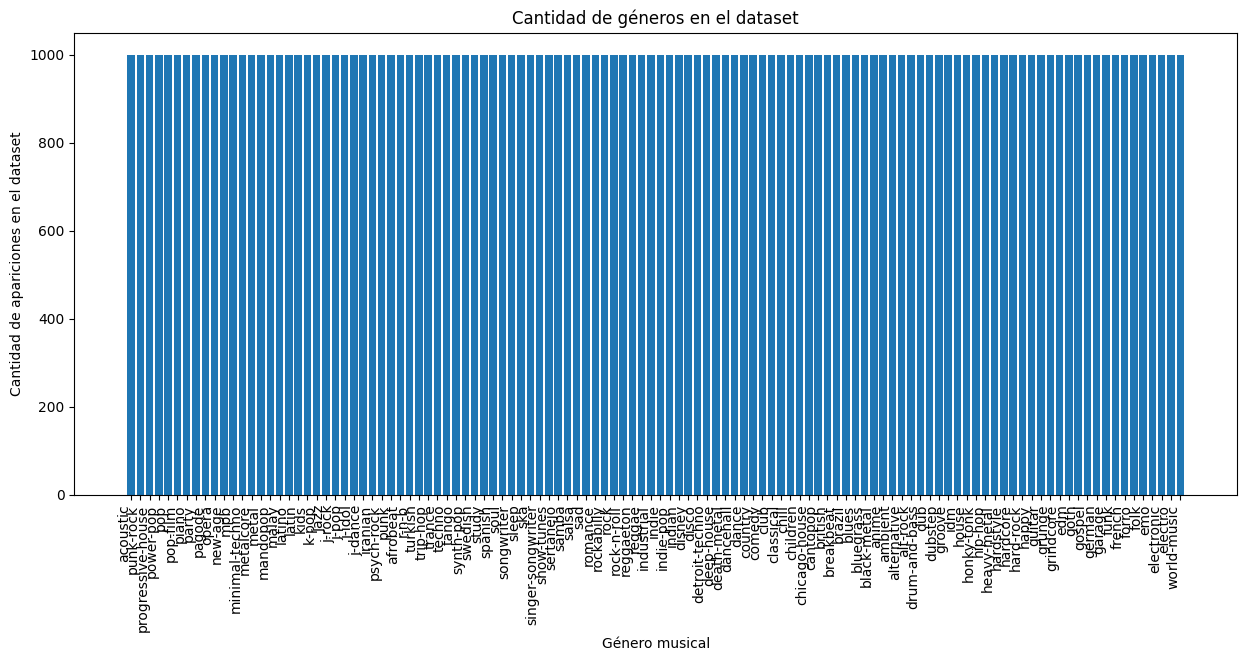

In [ ]:
# Crear un gráfico de barras
plt.figure(figsize=(15,6))
plt.bar(genre_most_repeat['genre'], genre_most_repeat['count'])

# Establecer etiquetas de los ejes
plt.xlabel('Género musical')
plt.ylabel('Cantidad de apariciones en el dataset')

# Establecer título
plt.title('Cantidad de géneros en el dataset')

# Rotar etiquetas del eje x para mejor visualización
plt.xticks(rotation=90, ha='right')

# Mostrar el gráfico
plt.show()

### Género de las canciones más populares

#### Géneros de las 300 canciones más populares del dataset

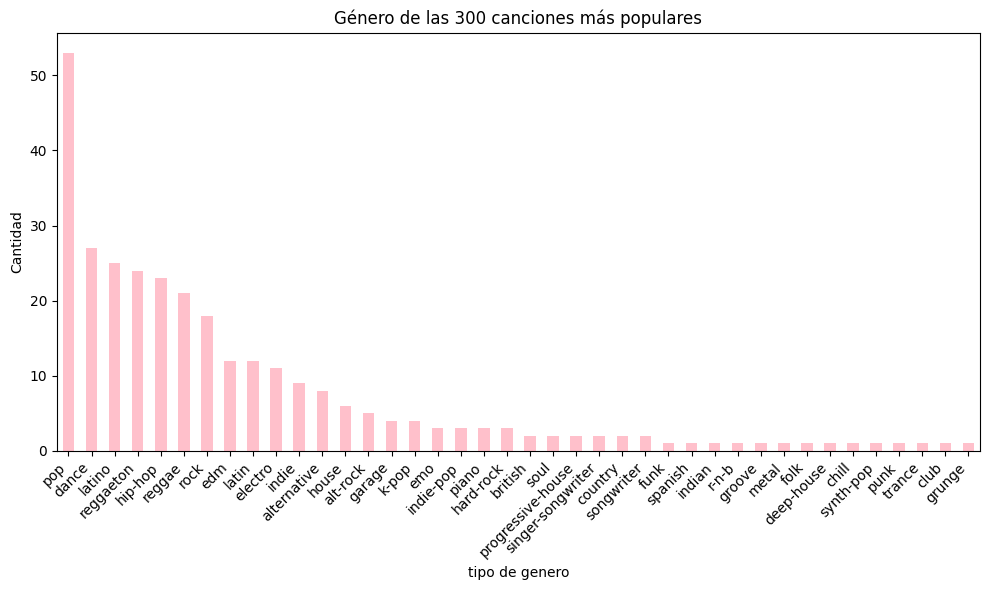

In [ ]:
#tomar los 300 mas populares
top_100 = df.nlargest(300, 'popularity')
#grafico de los generos de los 300 mas populares
genre_counts = top_100['track_genre'].value_counts()
plt.figure(figsize=(10, 6))
genre_counts.plot(kind='bar', color= 'pink')
plt.xlabel('tipo de genero')
plt.ylabel('Cantidad')
plt.title('Género de las 300 canciones más populares')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#### Promedio de popularidad por género

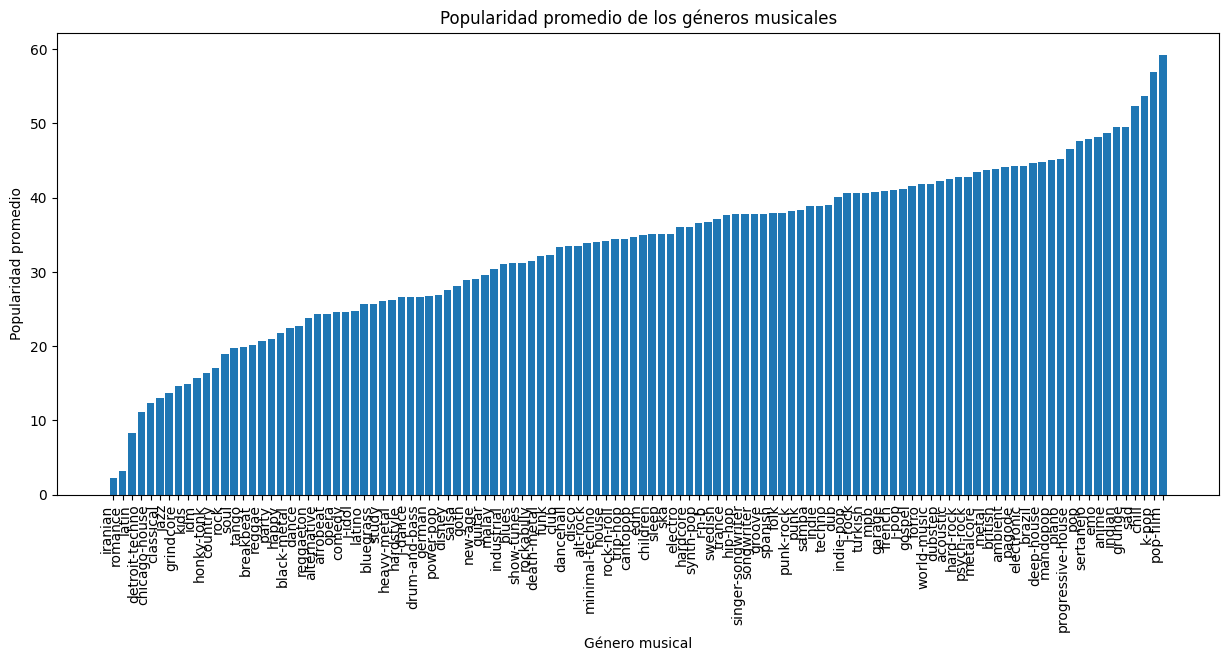

In [ ]:
# Promedio de la popularidad por género musical
popularity_genre = df.groupby('track_genre')['popularity'].mean().reset_index()
popularity_genre = popularity_genre.sort_values(by='popularity')

# Crear un gráfico de barras
plt.figure(figsize=(15,6))
plt.bar(popularity_genre['track_genre'], popularity_genre['popularity'])

# Establecer etiquetas de los ejes
plt.xlabel('Género musical')
plt.ylabel('Popularidad promedio')

# Establecer título
plt.title('Popularidad promedio de los géneros musicales')

# Rotar etiquetas del eje x para mejor visualización
plt.xticks(rotation=90, ha='right')

# Mostrar el gráfico
plt.show()

### Matrices de correlación por género


#### Matriz de correlacion para género pop

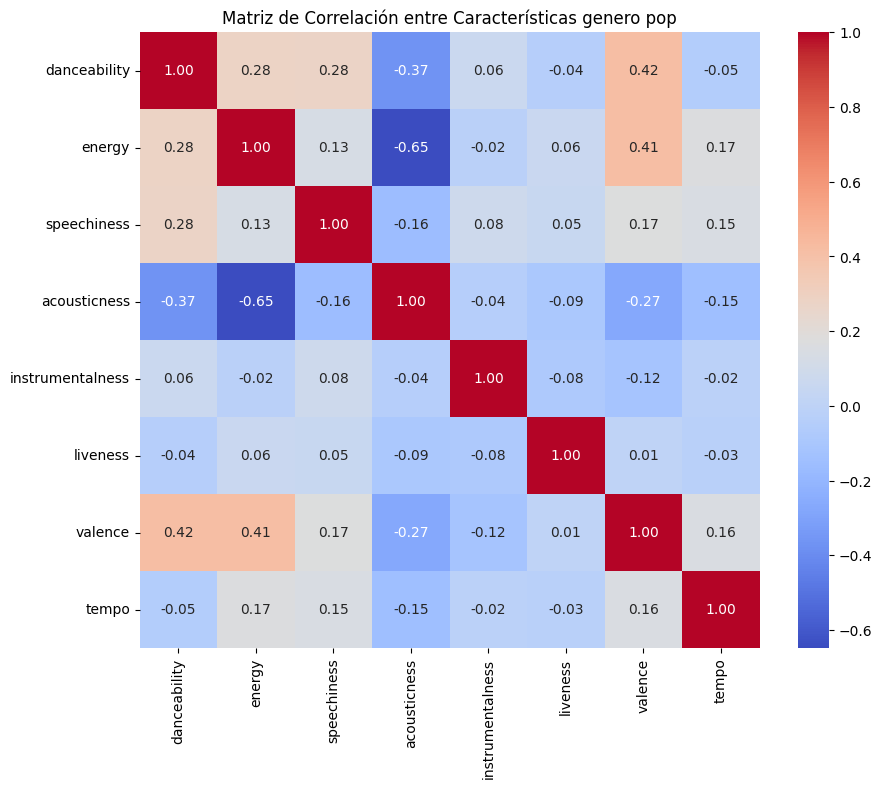

In [ ]:
# Filtrar el DataFrame por género (por ejemplo, pop)
pop_df = df[df['track_genre'] == 'pop']

# Calcular la matriz de correlación para el género "pop"
correlation_matrix = pop_df[['danceability', 'energy', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']].corr()
# Crear un mapa de calor para visualizar la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación entre Características genero pop')
plt.show()

#### Matriz de correlacion para género dance

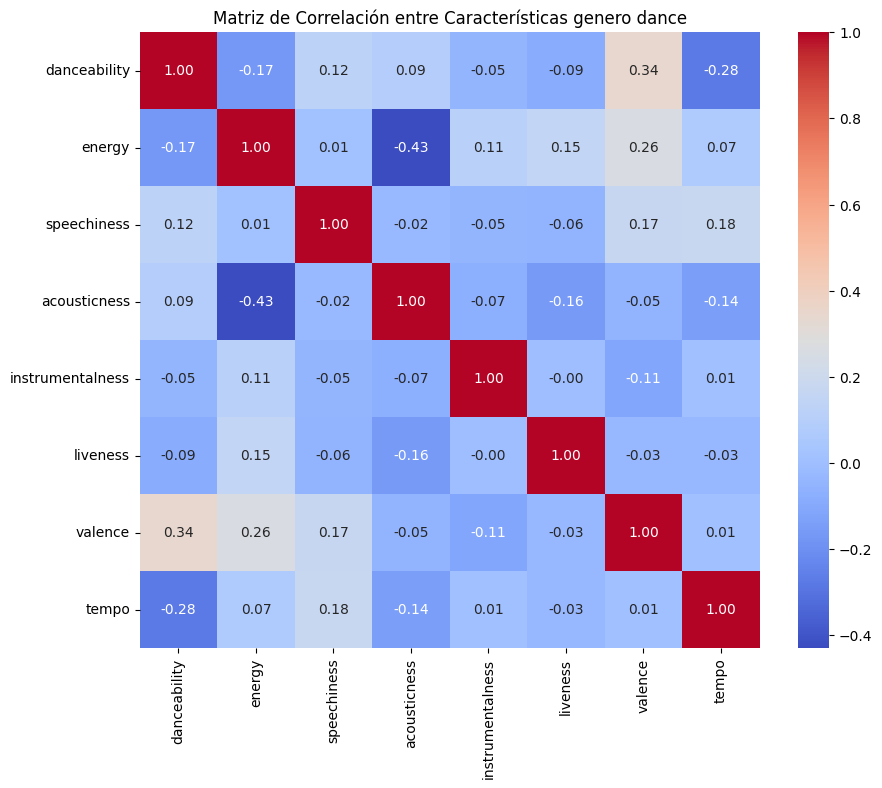

In [ ]:
# Filtrar el DataFrame por género (por ejemplo, dance)
dance_df = df[df['track_genre'] == 'dance']

# Calcular la matriz de correlación para el género "dance"
correlation_matrix = dance_df[['danceability', 'energy', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']].corr()
# Crear un mapa de calor para visualizar la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación entre Características genero dance')
plt.show()

#### Matriz de correlación de género latino

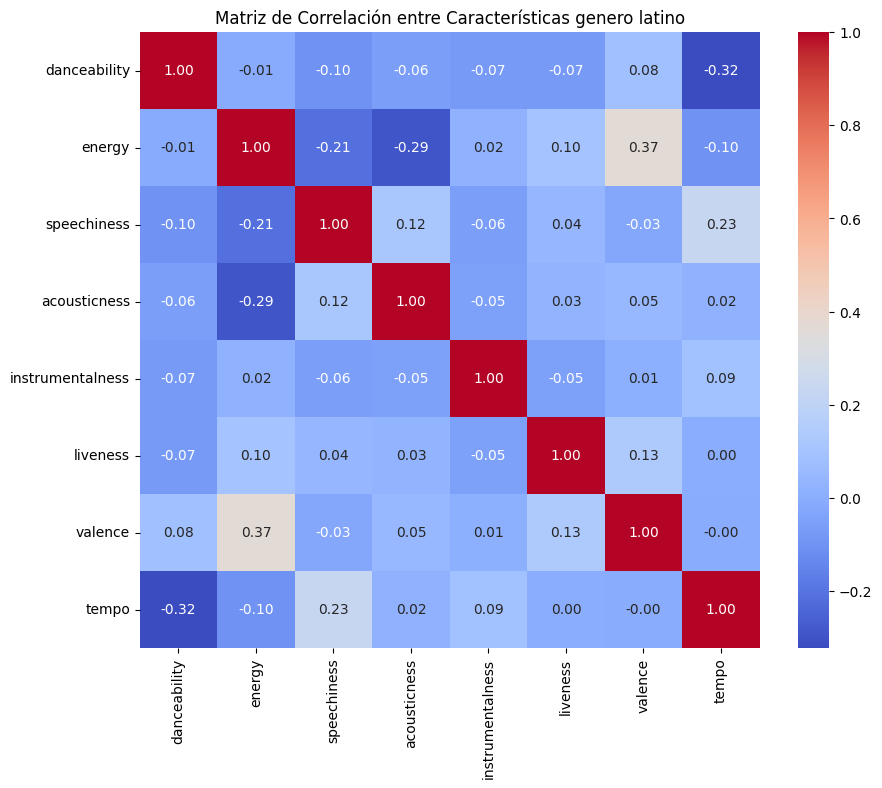

In [ ]:
# Filtrar el DataFrame por género (por ejemplo, latino)
latino_df = df[df['track_genre'] == 'latino']

# Calcular la matriz de correlación para el género "latino"
correlation_matrix = latino_df[['danceability', 'energy', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']].corr()
# Crear un mapa de calor para visualizar la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación entre Características genero latino')
plt.show()

#### Matriz de correlación de género reggaeton

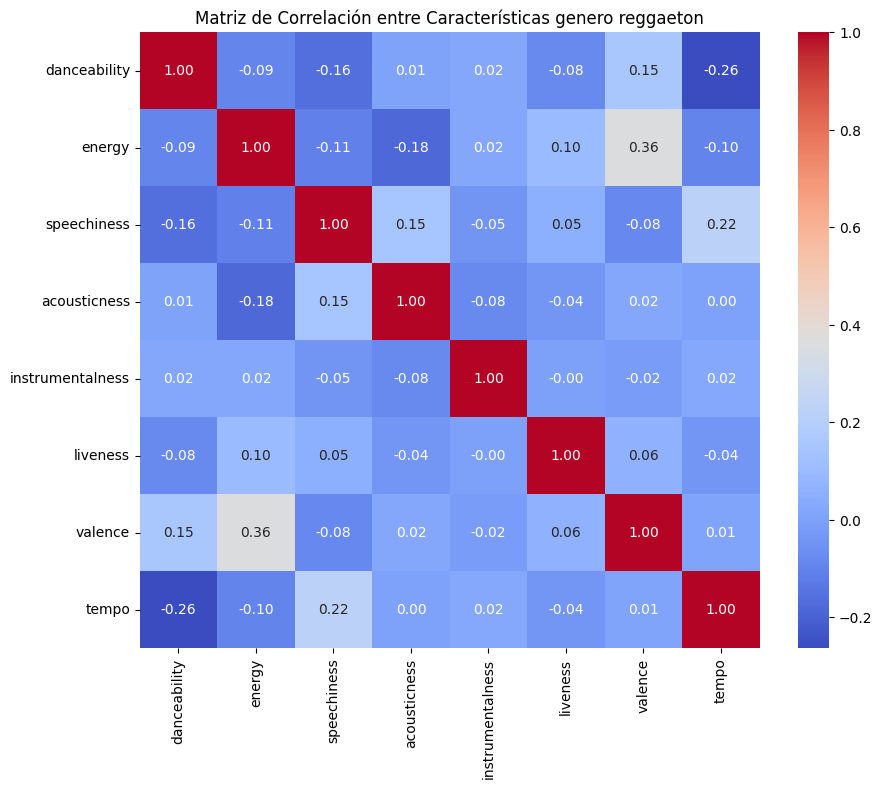

In [ ]:
# Filtrar el DataFrame por género (por ejemplo, reggaeton)
reggaeton_df = df[df['track_genre'] == 'reggaeton']

# Calcular la matriz de correlación para el género "reggaeton"
correlation_matrix = reggaeton_df[['danceability', 'energy', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']].corr()
# Crear un mapa de calor para visualizar la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación entre Características genero reggaeton')
plt.show()

#### Matriz de correlacion de género hip-hop

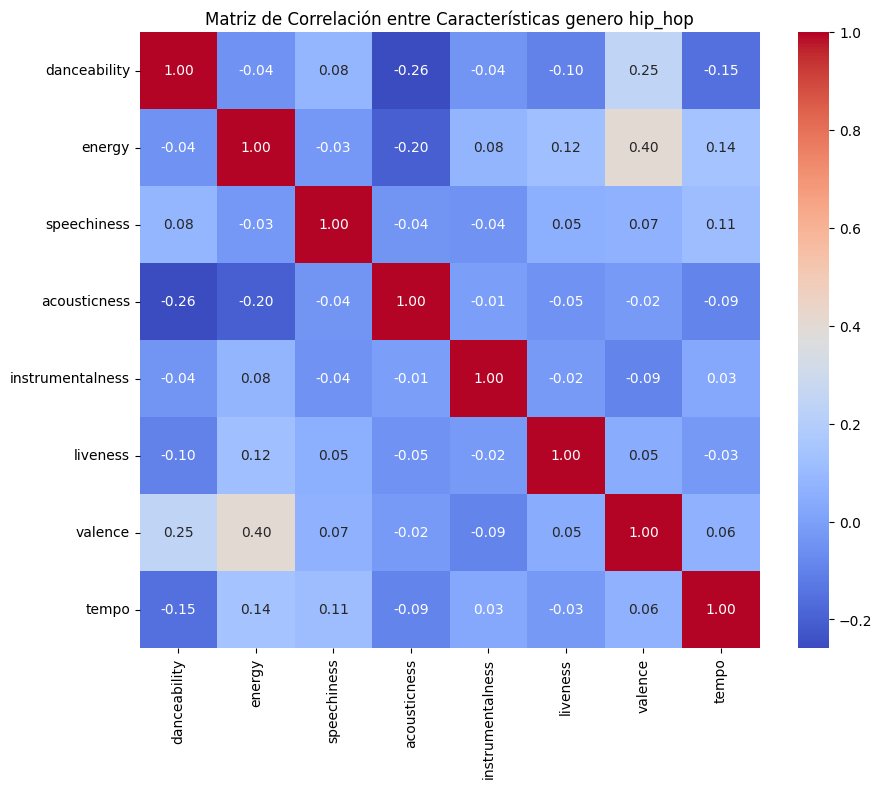

In [ ]:
# Filtrar el DataFrame por género (por ejemplo, hip-hop)
hip_hop_df = df[df['track_genre'] == 'hip-hop']

# Calcular la matriz de correlación para el género "hip-hop"
correlation_matrix = hip_hop_df[['danceability', 'energy', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']].corr()
# Crear un mapa de calor para visualizar la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación entre Características genero hip_hop')
plt.show()

#### Matriz de correlacion de género reggae

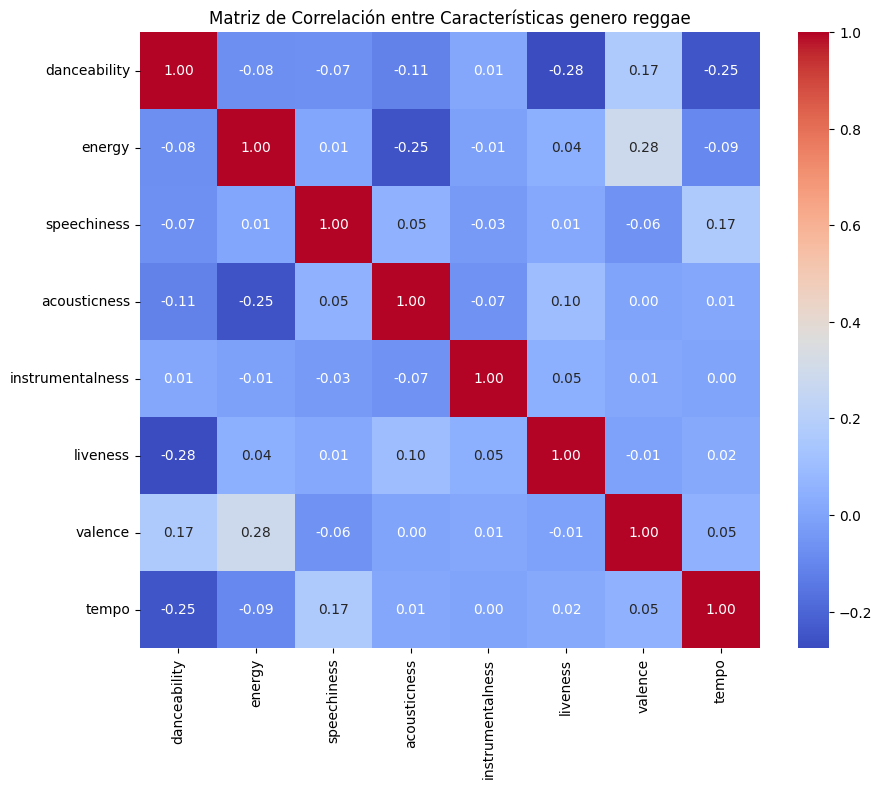

In [ ]:
# Filtrar el DataFrame por género (por ejemplo, reggae)
reggae_df = df[df['track_genre'] == 'reggae']

# Calcular la matriz de correlación para el género "reggae"
correlation_matrix = reggae_df[['danceability', 'energy', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']].corr()
# Crear un mapa de calor para visualizar la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación entre Características genero reggae')
plt.show()

#### Matriz de correlacion de género rock

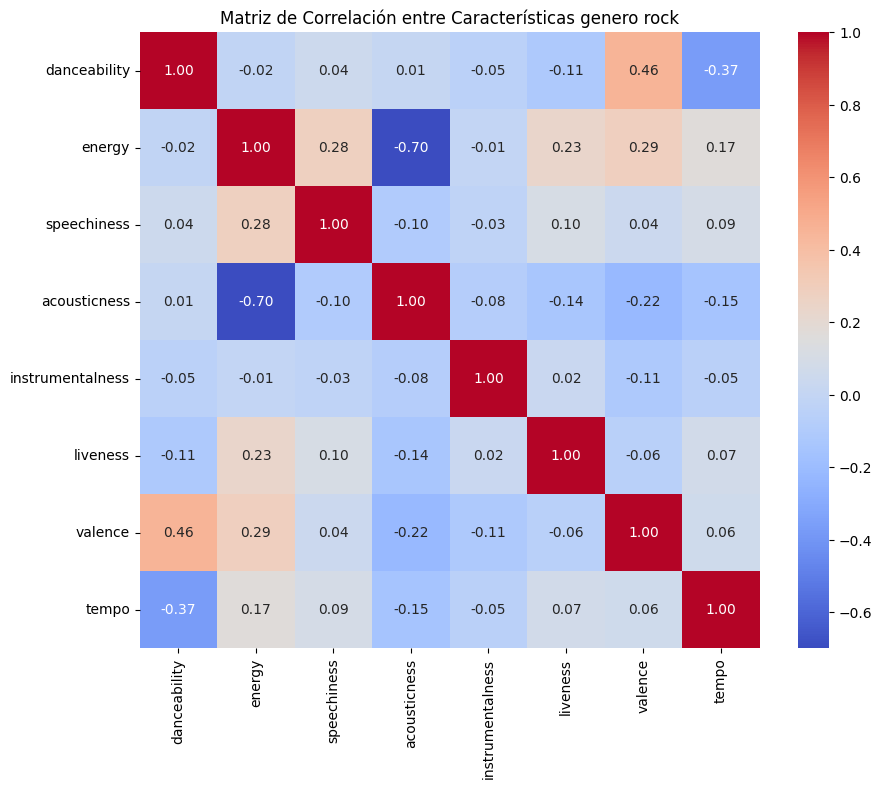

In [ ]:
# Filtrar el DataFrame por género (por ejemplo, rock)
rock_df = df[df['track_genre'] == 'rock']

# Calcular la matriz de correlación para el género "rock"
correlation_matrix = rock_df[['danceability', 'energy', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']].corr()
# Crear un mapa de calor para visualizar la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación entre Características genero rock')
plt.show()

#### Matriz de correlacion de género edm

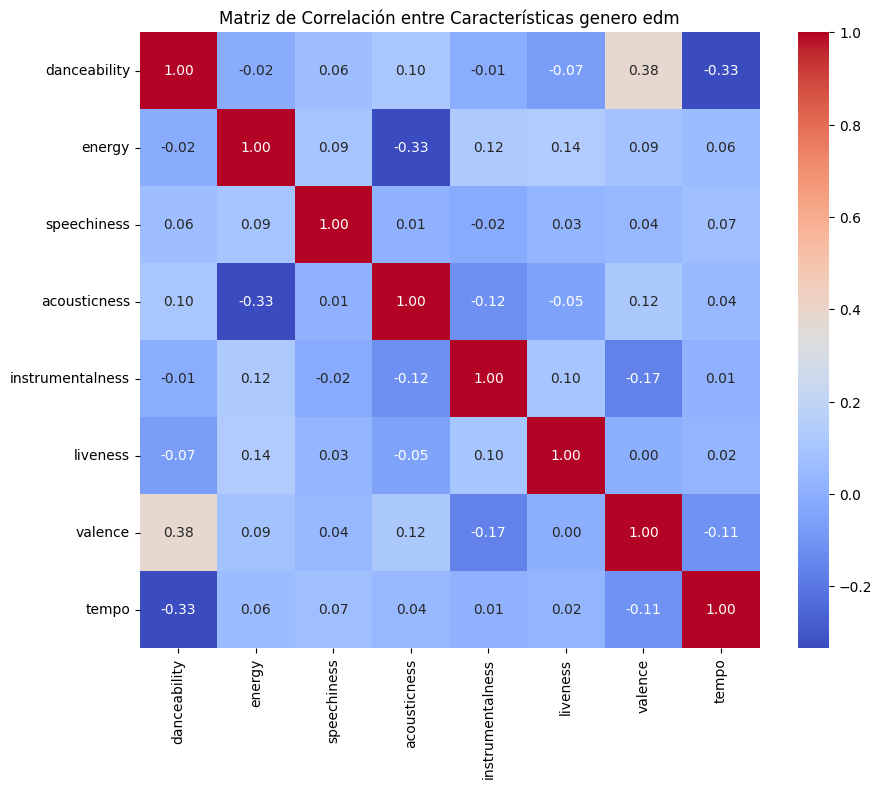

In [ ]:
# Filtrar el DataFrame por género (por ejemplo, edm)
edm_df = df[df['track_genre'] == 'edm']

# Calcular la matriz de correlación para el género "edm"
correlation_matrix = edm_df[['danceability', 'energy', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']].corr()
# Crear un mapa de calor para visualizar la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación entre Características genero edm')
plt.show()

#### Matriz de correlación de género latin

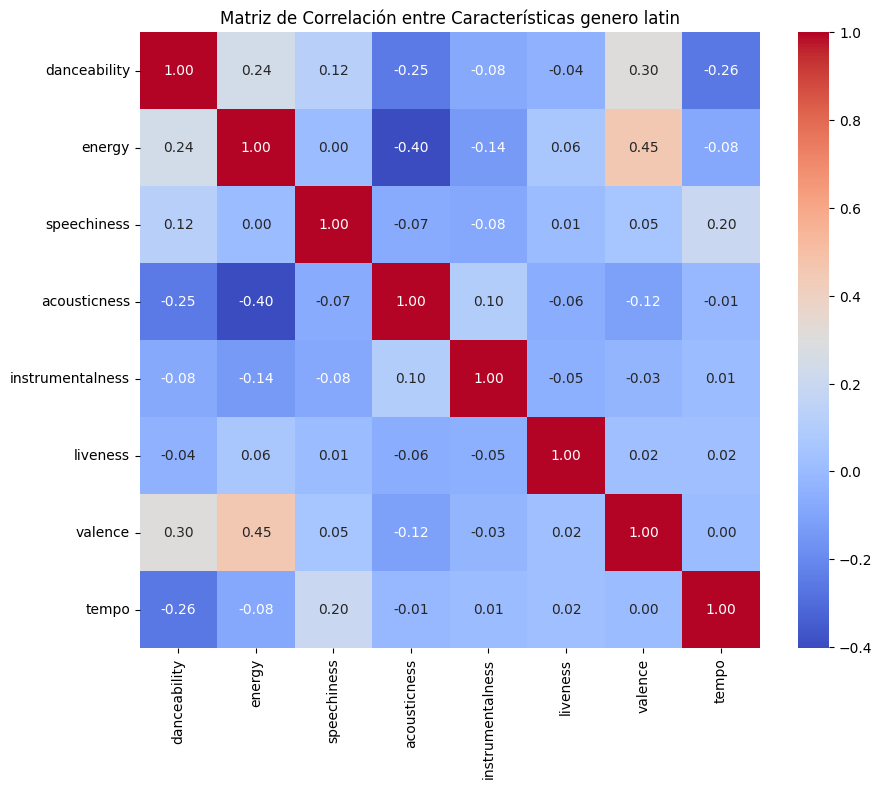

In [ ]:
# Filtrar el DataFrame por género (por ejemplo, latin)
latin_df = df[df['track_genre'] == 'latin']

# Calcular la matriz de correlación para el género "latin"
correlation_matrix = latin_df[['danceability', 'energy', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']].corr()
# Crear un mapa de calor para visualizar la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación entre Características genero latin')
plt.show()

#### Matriz de correlacion de género electro

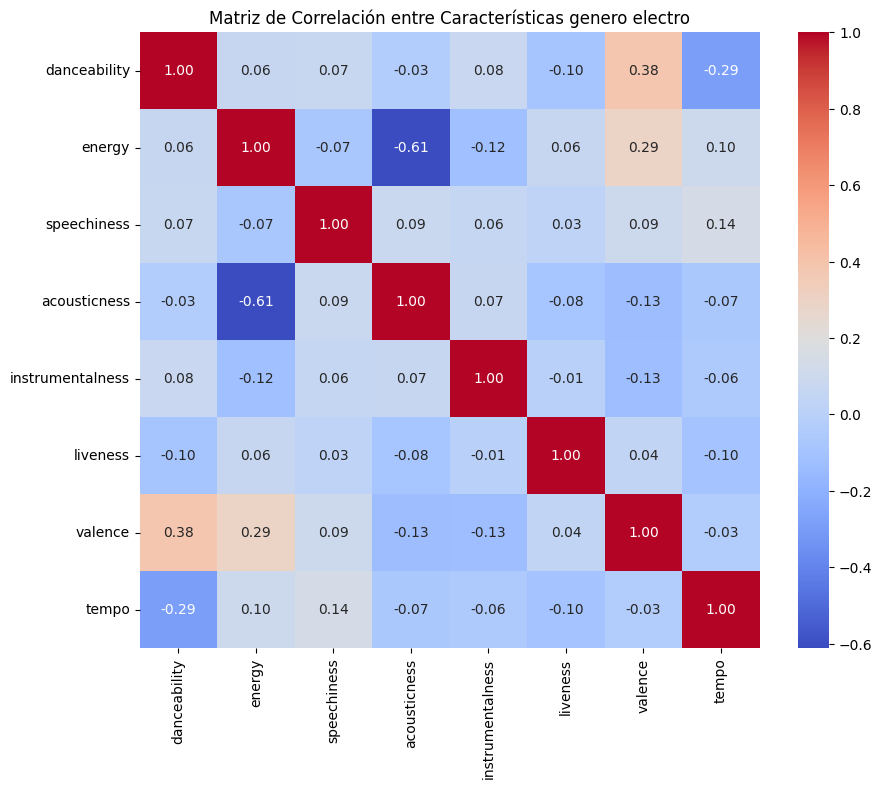

In [ ]:
# Filtrar el DataFrame por género (por ejemplo, electro)
electro_df = df[df['track_genre'] == 'electro']

# Calcular la matriz de correlación para el género "electro"
correlation_matrix = electro_df[['danceability', 'energy', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']].corr()
# Crear un mapa de calor para visualizar la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación entre Características genero electro')
plt.show()

#### Matriz de correlación de género indie

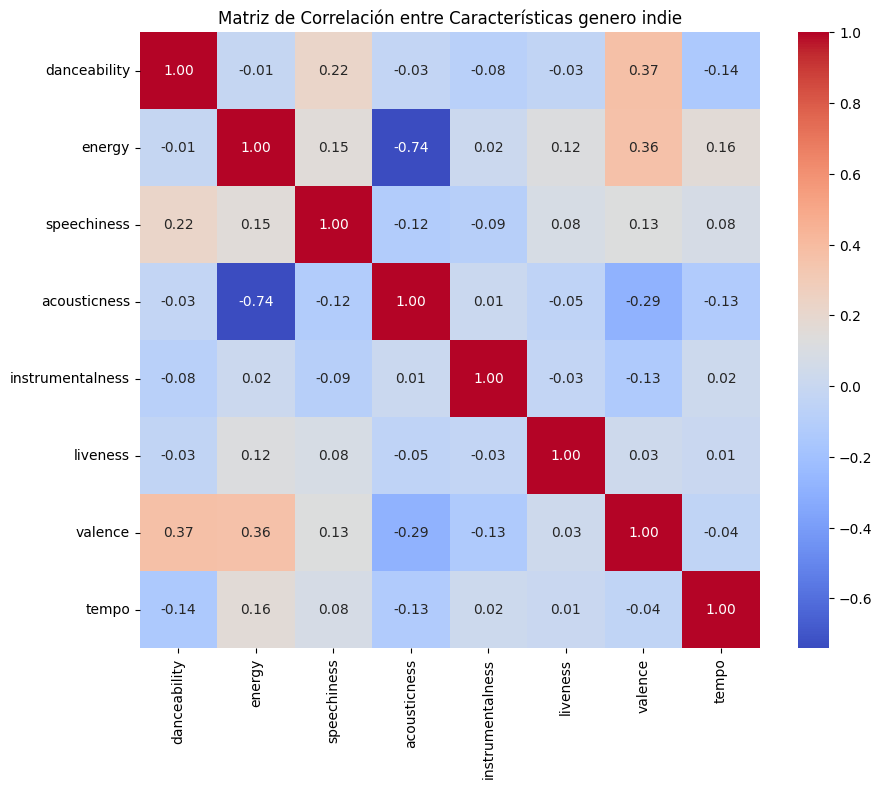

In [ ]:
# Filtrar el DataFrame por género (por ejemplo, indie)
indie_df = df[df['track_genre'] == 'indie']

# Calcular la matriz de correlación para el género "indie"
correlation_matrix = indie_df[['danceability', 'energy', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']].corr()
# Crear un mapa de calor para visualizar la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación entre Características genero indie')
plt.show()

#### Matriz de correlacion de género alternative

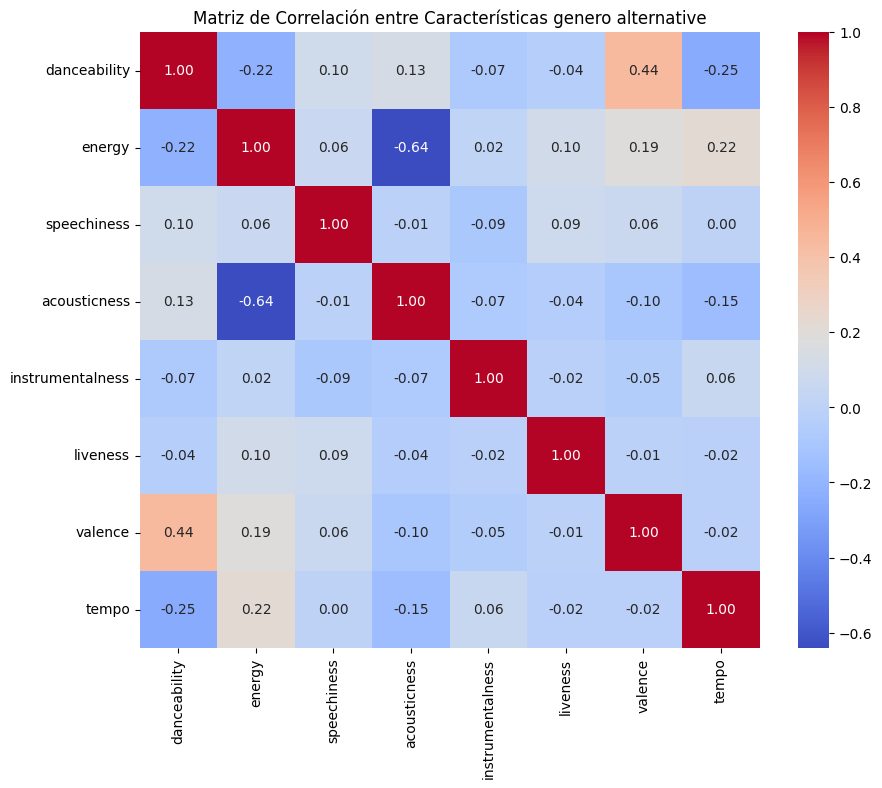

In [ ]:
# Filtrar el DataFrame por género (por ejemplo, alternative)
alternative_df = df[df['track_genre'] == 'alternative']

# Calcular la matriz de correlación para el género "alternative"
correlation_matrix = alternative_df[['danceability', 'energy', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']].corr()
# Crear un mapa de calor para visualizar la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación entre Características genero alternative')
plt.show()

#### Matriz de correlacion de género house

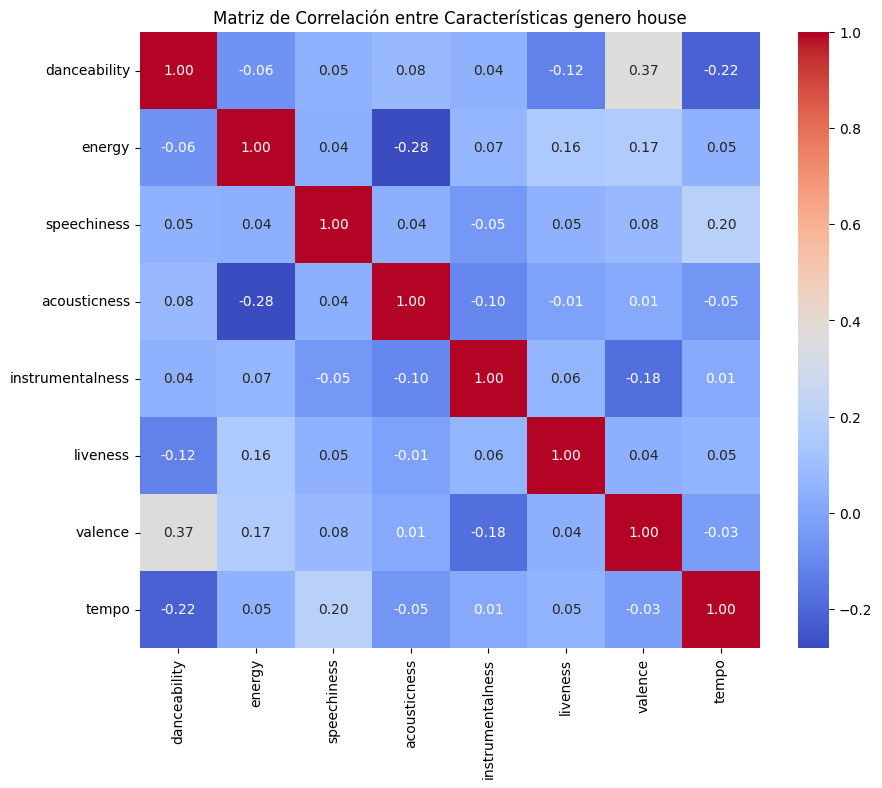

In [ ]:
# Filtrar el DataFrame por género (por ejemplo, house)
house_df = df[df['track_genre'] == 'house']

# Calcular la matriz de correlación para el género "house"
correlation_matrix = house_df[['danceability', 'energy', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']].corr()
# Crear un mapa de calor para visualizar la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación entre Características genero house')
plt.show()

#### Matriz de correlación de género alt-rock

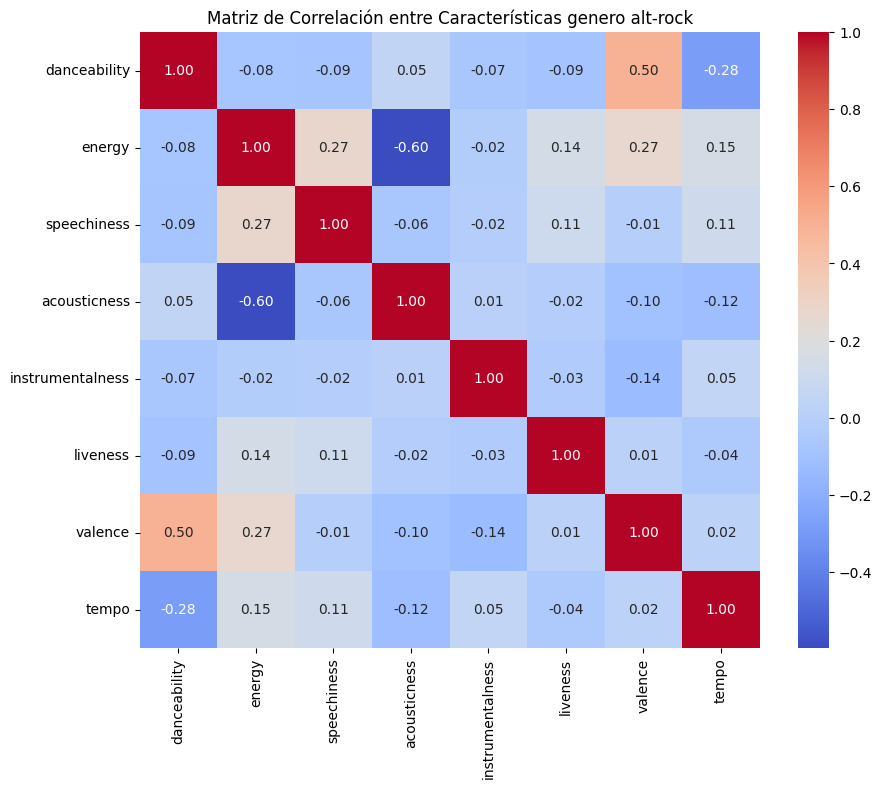

In [ ]:
# Filtrar el DataFrame por género (por ejemplo, alt-rock)
rock_df = df[df['track_genre'] == 'alt-rock']

# Calcular la matriz de correlación para el género "alt-rock"
correlation_matrix = rock_df[['danceability', 'energy', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']].corr()
# Crear un mapa de calor para visualizar la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación entre Características genero alt-rock')
plt.show()

#### Matriz de correlación de género garage

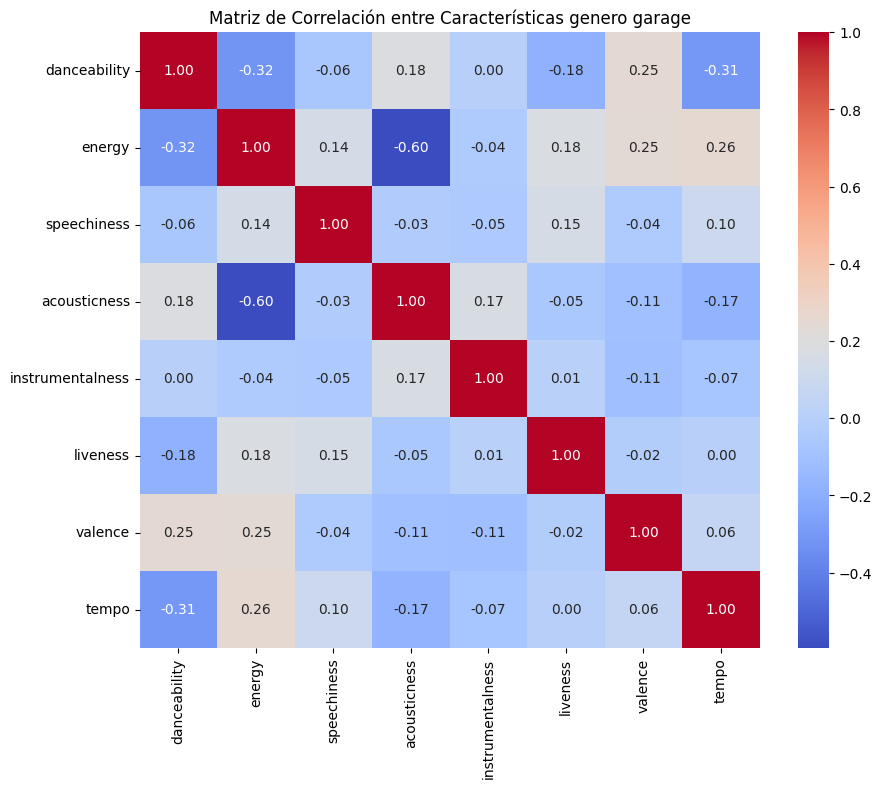

In [ ]:
# Filtrar el DataFrame por género (por ejemplo, garage)
garage_df = df[df['track_genre'] == 'garage']

# Calcular la matriz de correlación para el género "garage"
correlation_matrix = garage_df[['danceability', 'energy', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']].corr()
# Crear un mapa de calor para visualizar la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación entre Características genero garage')
plt.show()

#### Matriz de correlación género k-pop

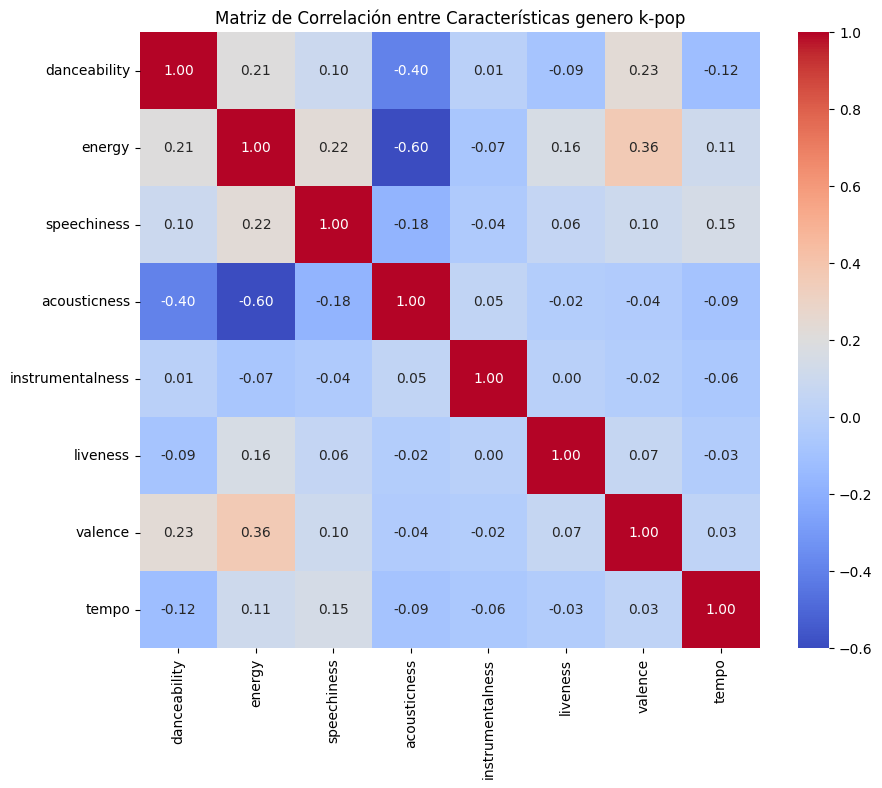

In [ ]:
# Filtrar el DataFrame por género (por ejemplo, k-pop)
garage_df = df[df['track_genre'] == 'k-pop']

# Calcular la matriz de correlación para el género "k-pop"
correlation_matrix = garage_df[['danceability', 'energy', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']].corr()
# Crear un mapa de calor para visualizar la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación entre Características genero k-pop')
plt.show()

#### Matriz de correlación género emo

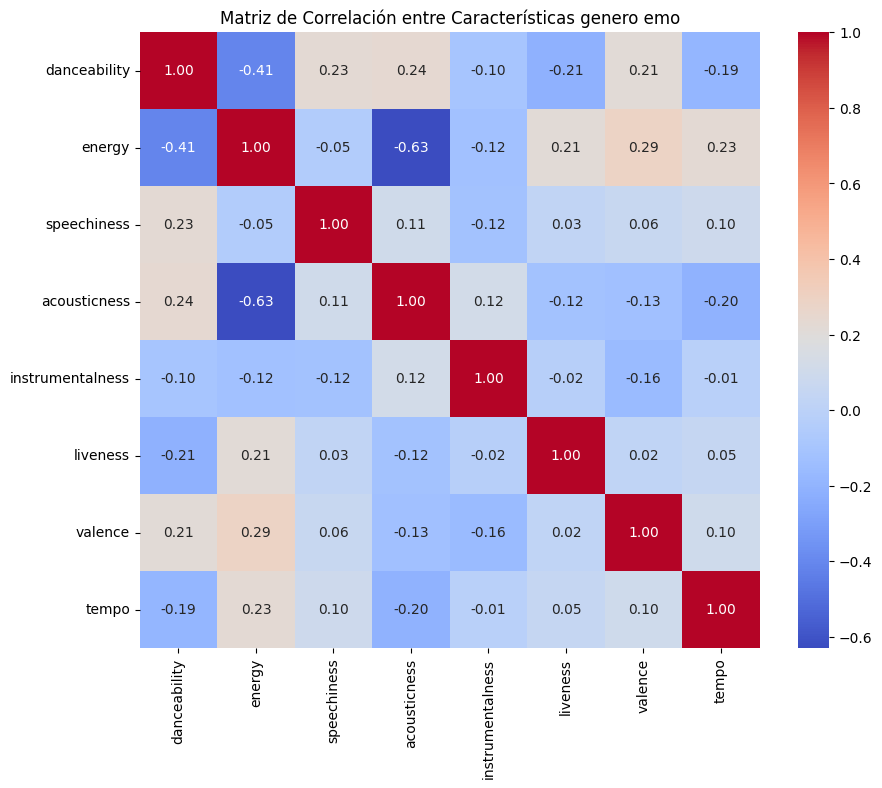

In [ ]:
# Filtrar el DataFrame por género (por ejemplo, emo)
garage_df = df[df['track_genre'] ==  'emo']

# Calcular la matriz de correlación para el género emo"
correlation_matrix = garage_df[['danceability', 'energy', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']].corr()
# Crear un mapa de calor para visualizar la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación entre Características genero emo')
plt.show()

#### Matriz de correlación género indie-pop

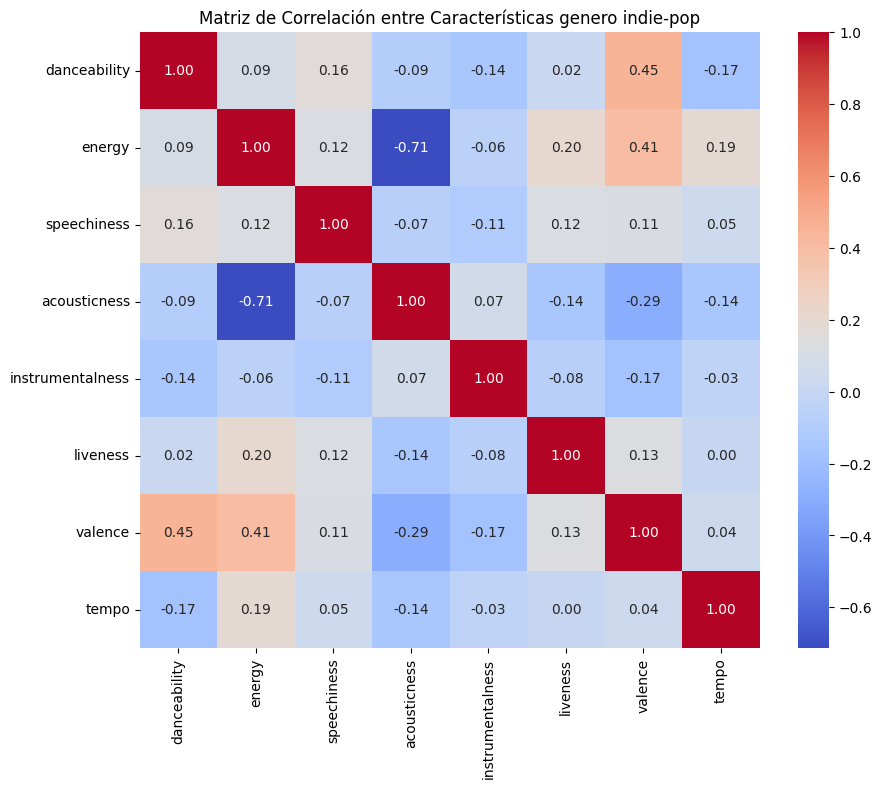

In [ ]:
# Filtrar el DataFrame por género (por ejemplo, indie-pop)
garage_df = df[df['track_genre'] == 'indie-pop']

# Calcular la matriz de correlación para el género "indie-pop"
correlation_matrix = garage_df[['danceability', 'energy', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']].corr()
# Crear un mapa de calor para visualizar la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación entre Características genero indie-pop')
plt.show()

#### Matriz de correlación género piano

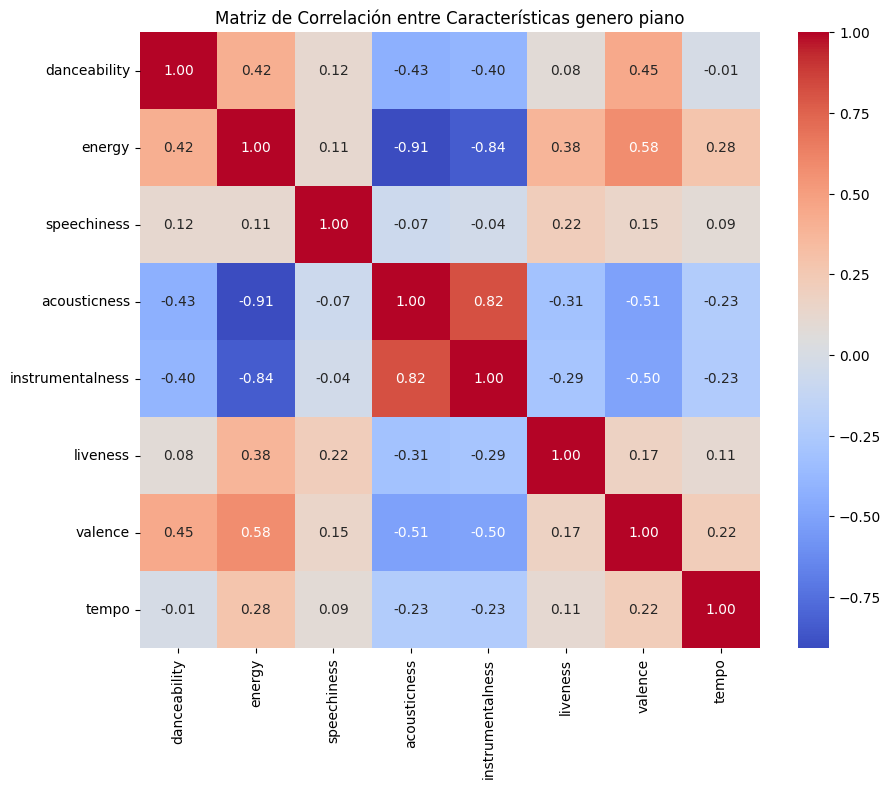

In [ ]:
# Filtrar el DataFrame por género (por ejemplo, piano)
garage_df = df[df['track_genre'] == 'piano']

# Calcular la matriz de correlación para el género "piano"
correlation_matrix = garage_df[['danceability', 'energy', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']].corr()
# Crear un mapa de calor para visualizar la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación entre Características genero piano')
plt.show()

#### Matriz de correlación género hard-rock

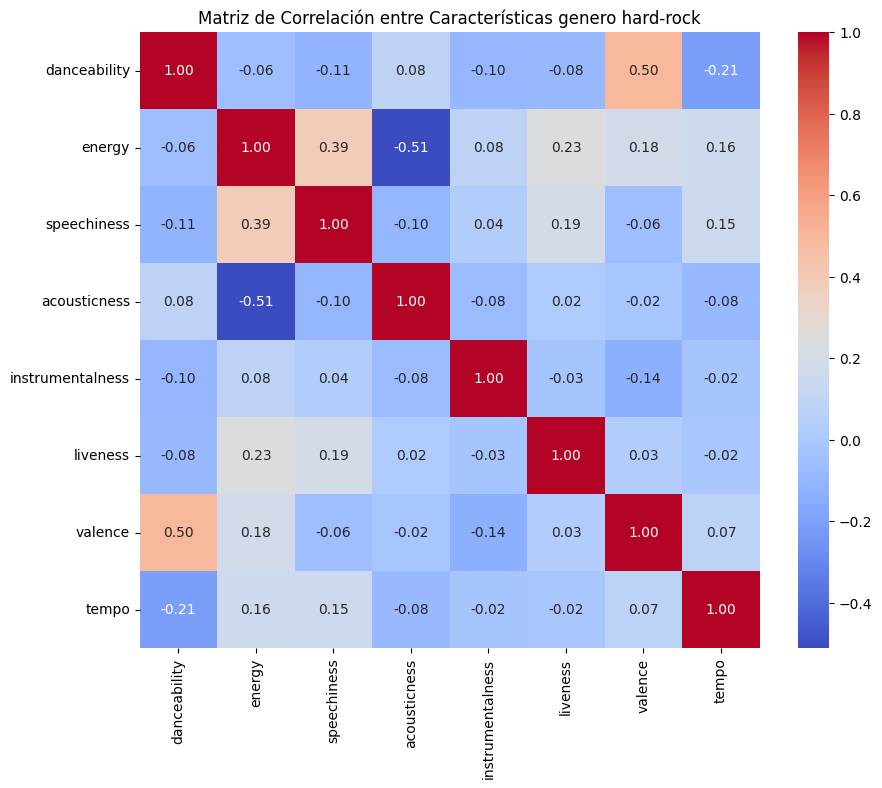

In [ ]:
# Filtrar el DataFrame por género (por ejemplo, hard-rock)
garage_df = df[df['track_genre'] == 'hard-rock']

# Calcular la matriz de correlación para el género "hard-rock"
correlation_matrix = garage_df[['danceability', 'energy', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']].corr()
# Crear un mapa de calor para visualizar la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación entre Características genero hard-rock')
plt.show()

#### Matriz de correlación género british

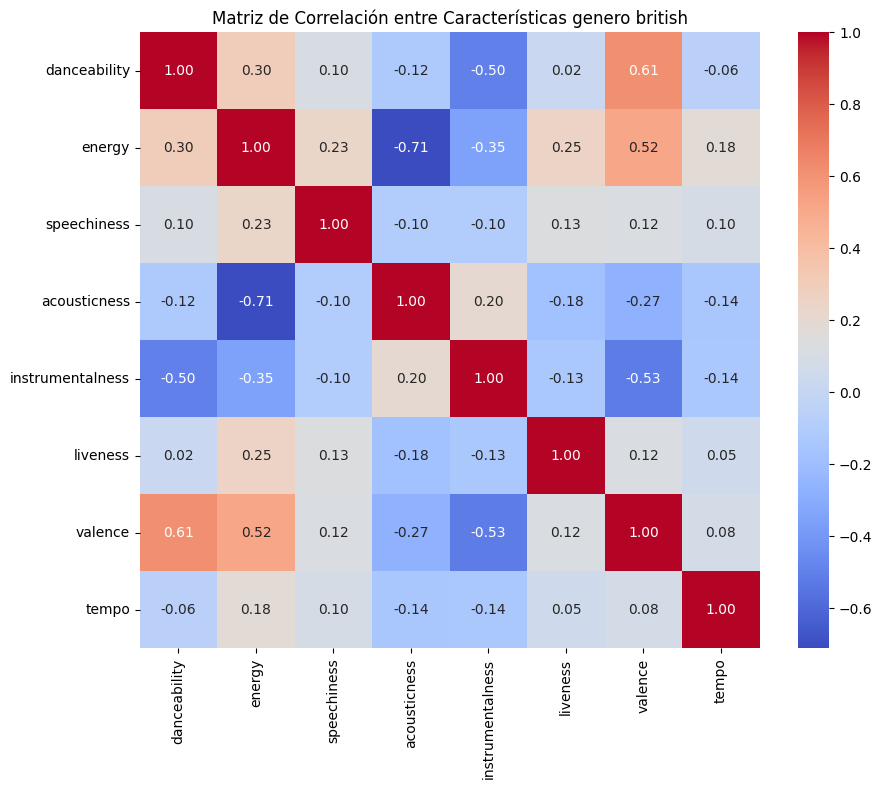

In [ ]:
# Filtrar el DataFrame por género (por ejemplo, british)
garage_df = df[df['track_genre'] == 'british']

# Calcular la matriz de correlación para el género "british"
correlation_matrix = garage_df[['danceability', 'energy', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']].corr()
# Crear un mapa de calor para visualizar la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación entre Características genero british')
plt.show()

#### Matriz de correlación género soul

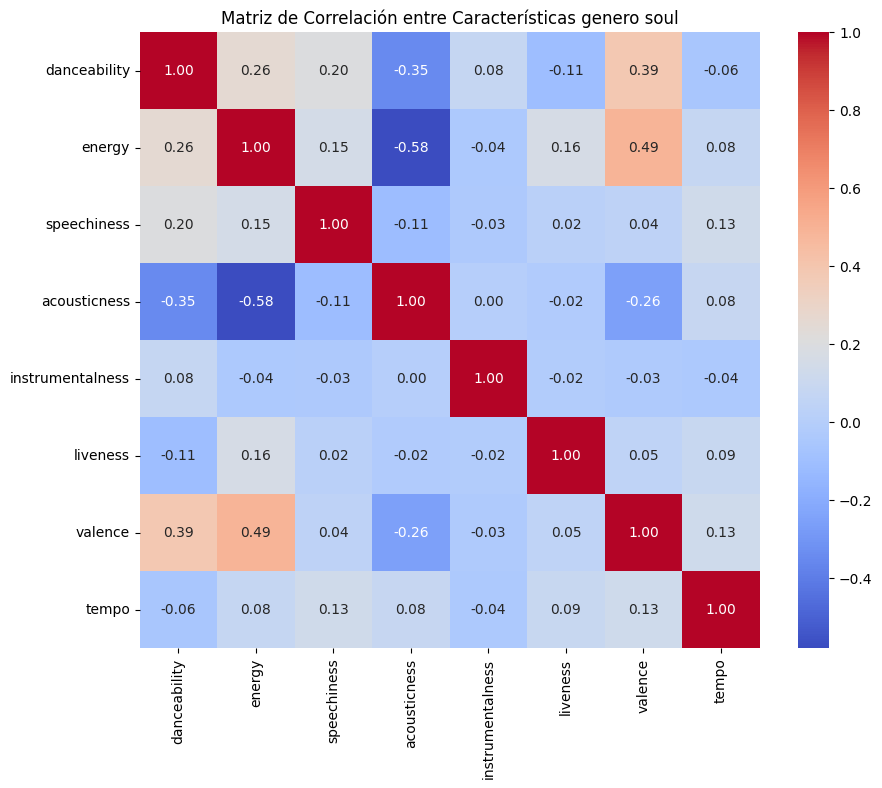

In [ ]:
# Filtrar el DataFrame por género (por ejemplo, soul)
garage_df = df[df['track_genre'] == 'soul']

# Calcular la matriz de correlación para el género "soul"
correlation_matrix = garage_df[['danceability', 'energy', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']].corr()
# Crear un mapa de calor para visualizar la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación entre Características genero soul')
plt.show()

#### Matriz de correlación género progressive-house

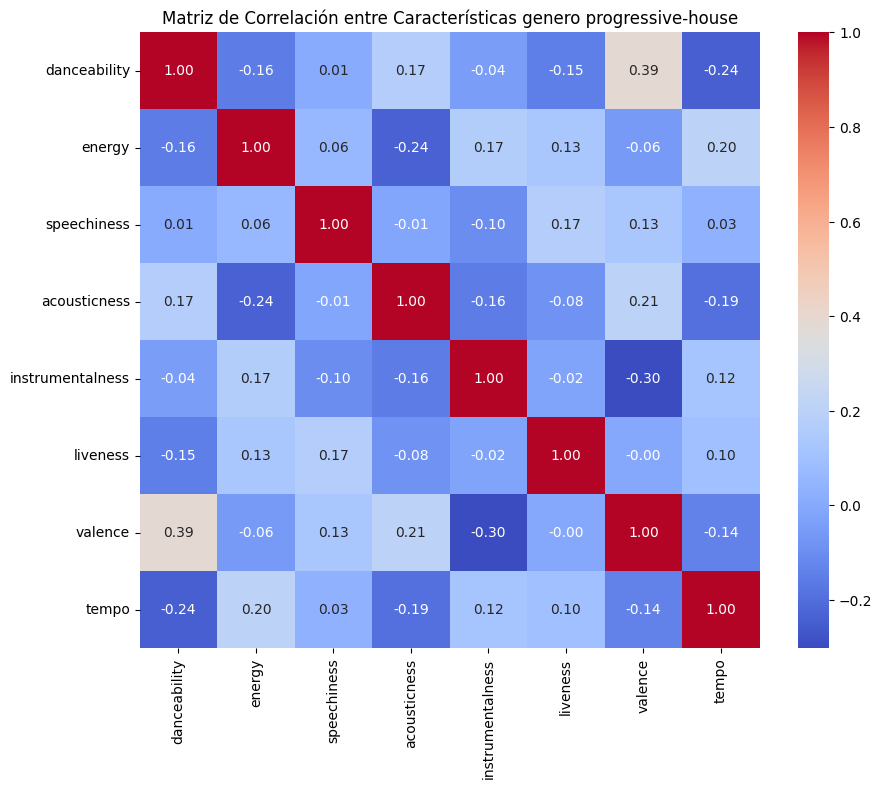

In [ ]:
# Filtrar el DataFrame por género (por ejemplo, progressive-house)
garage_df = df[df['track_genre'] == 'progressive-house']

# Calcular la matriz de correlación para el género "progressive-house"
correlation_matrix = garage_df[['danceability', 'energy', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']].corr()
# Crear un mapa de calor para visualizar la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación entre Características genero progressive-house')
plt.show()

#### Matriz de correlación género singer-songwriter

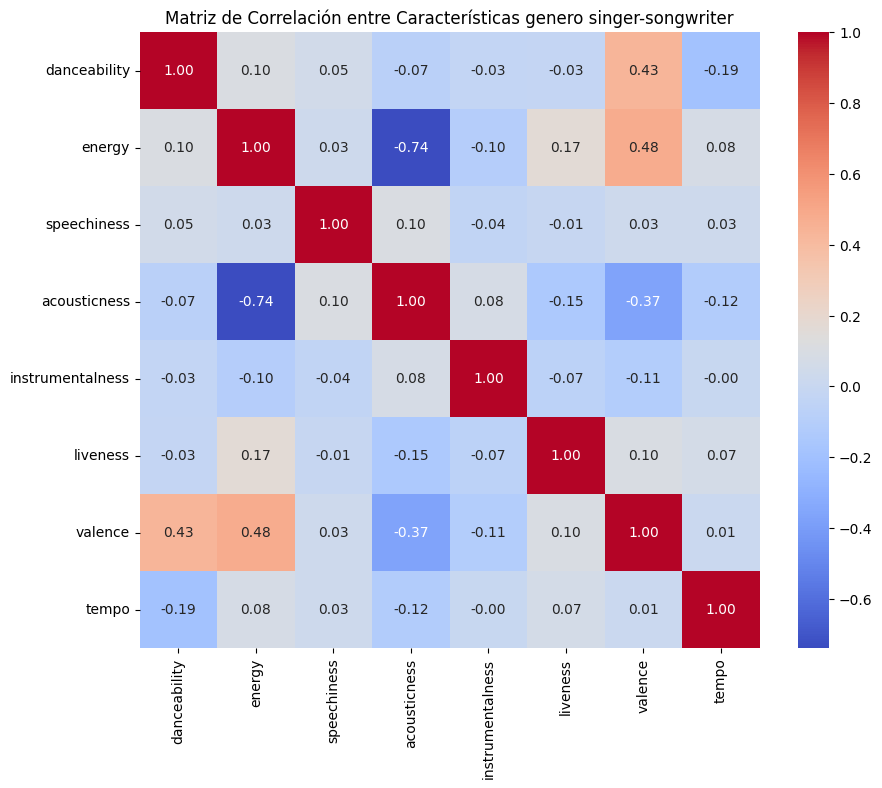

In [ ]:
# Filtrar el DataFrame por género (por ejemplo, singer-songwriter)
garage_df = df[df['track_genre'] == 'singer-songwriter']

# Calcular la matriz de correlación para el género "singer-songwriter"
correlation_matrix = garage_df[['danceability', 'energy', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']].corr()
# Crear un mapa de calor para visualizar la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación entre Características genero singer-songwriter')
plt.show()

#### Matriz de correlación género country

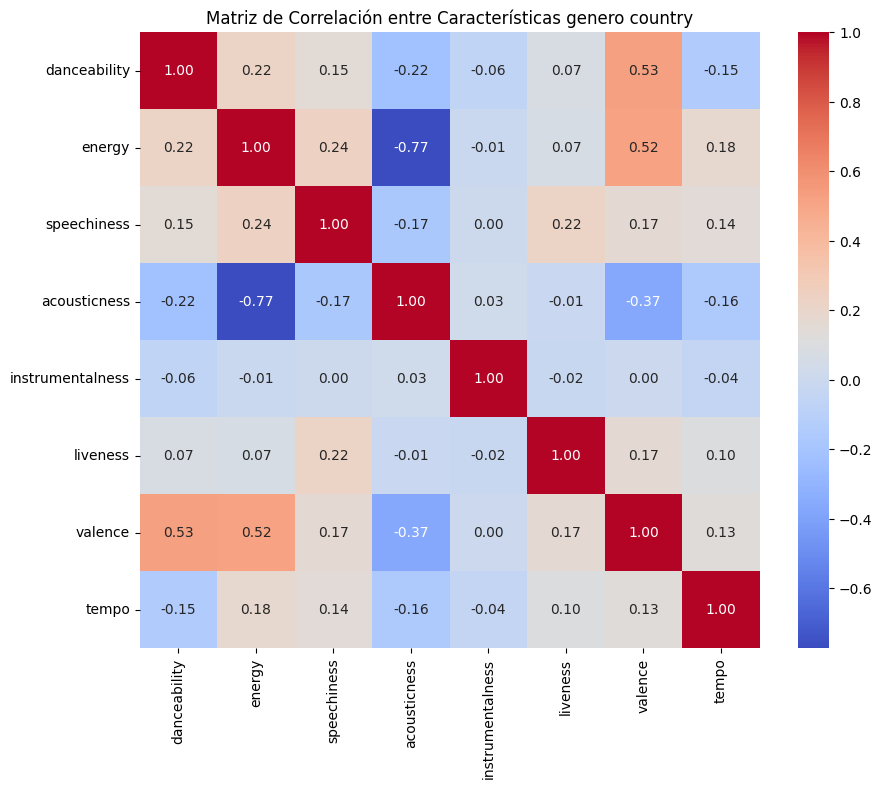

In [ ]:
# Filtrar el DataFrame por género (por ejemplo, country)
garage_df = df[df['track_genre'] == 'country']

# Calcular la matriz de correlación para el género "country"
correlation_matrix = garage_df[['danceability', 'energy', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']].corr()
# Crear un mapa de calor para visualizar la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación entre Características genero country')
plt.show()

#### Matriz de correlación género songwriter

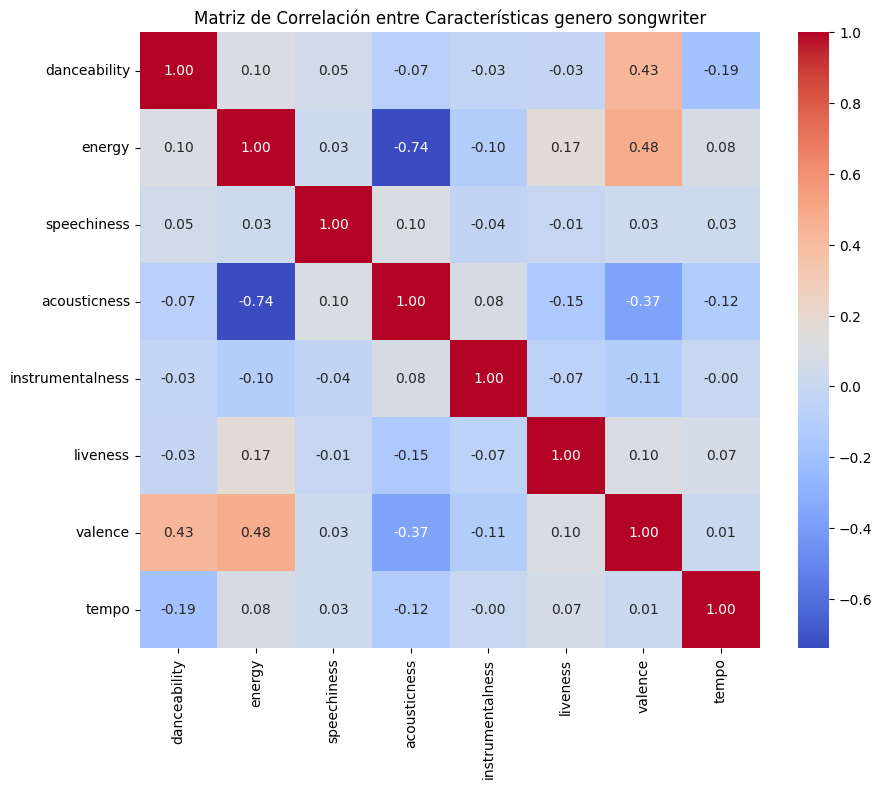

In [ ]:
# Filtrar el DataFrame por género (por ejemplo, songwriter)
garage_df = df[df['track_genre'] == 'songwriter']

# Calcular la matriz de correlación para el género "songwriter"
correlation_matrix = garage_df[['danceability', 'energy', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']].corr()
# Crear un mapa de calor para visualizar la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación entre Características genero songwriter')
plt.show()

#### Matriz de correlación género funk

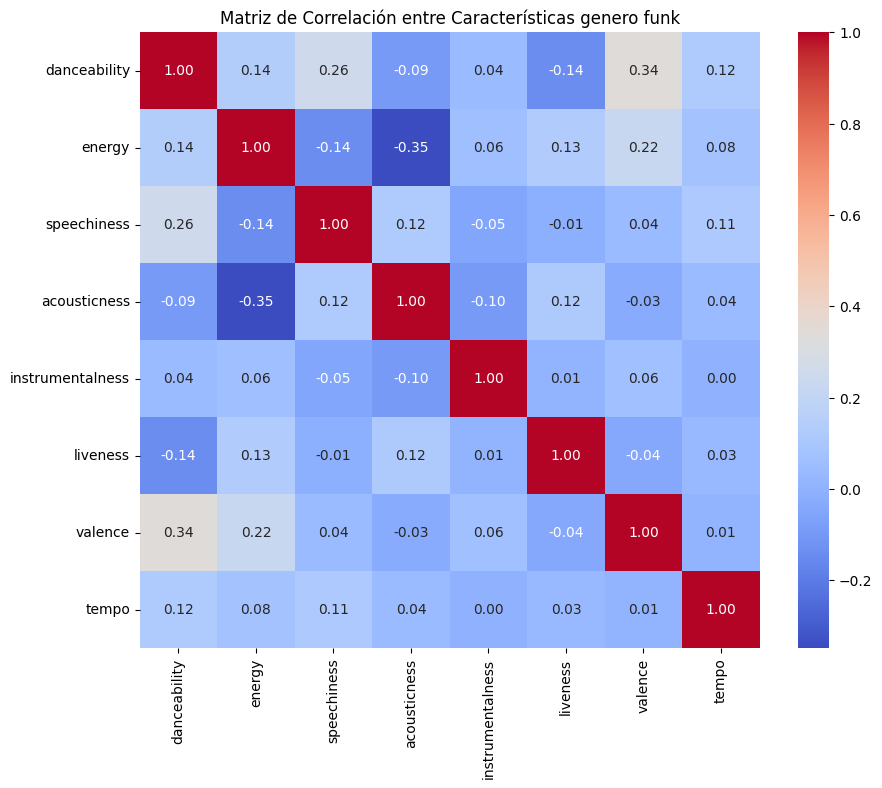

In [ ]:
# Filtrar el DataFrame por género (por ejemplo, funk)
garage_df = df[df['track_genre'] == 'funk']

# Calcular la matriz de correlación para el género "funk"
correlation_matrix = garage_df[['danceability', 'energy', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']].corr()
# Crear un mapa de calor para visualizar la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación entre Características genero funk')
plt.show()

#### Matriz de correlación género spanish

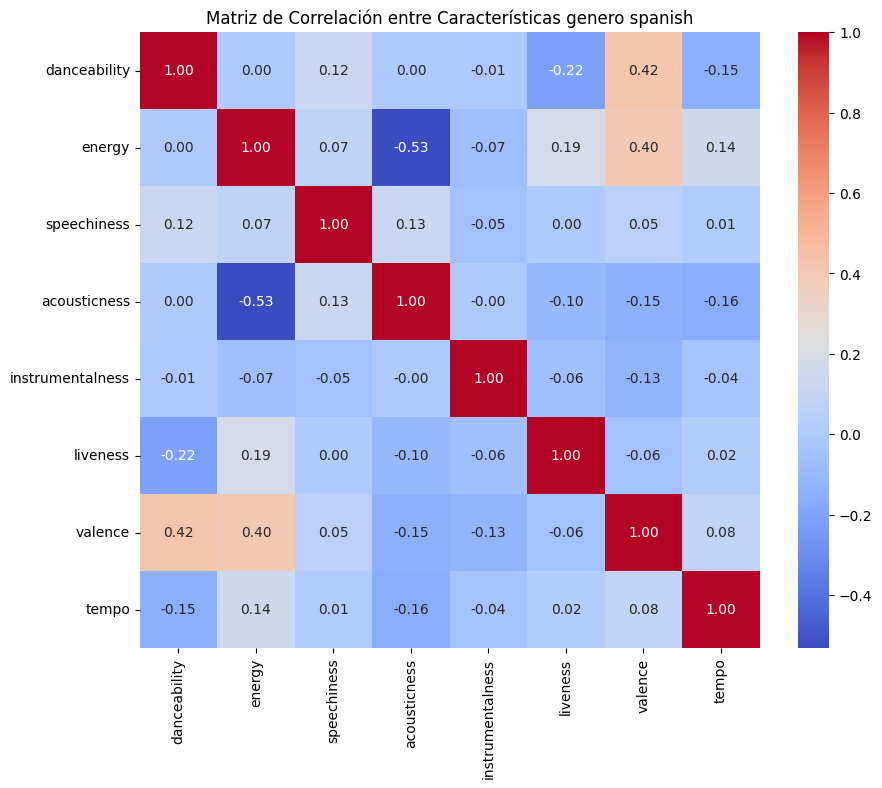

In [ ]:
# Filtrar el DataFrame por género (por ejemplo, spanish)
garage_df = df[df['track_genre'] == 'spanish']

# Calcular la matriz de correlación para el género "spanish"
correlation_matrix = garage_df[['danceability', 'energy', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']].corr()
# Crear un mapa de calor para visualizar la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación entre Características genero spanish')
plt.show()

#### Matriz de correlación género indian

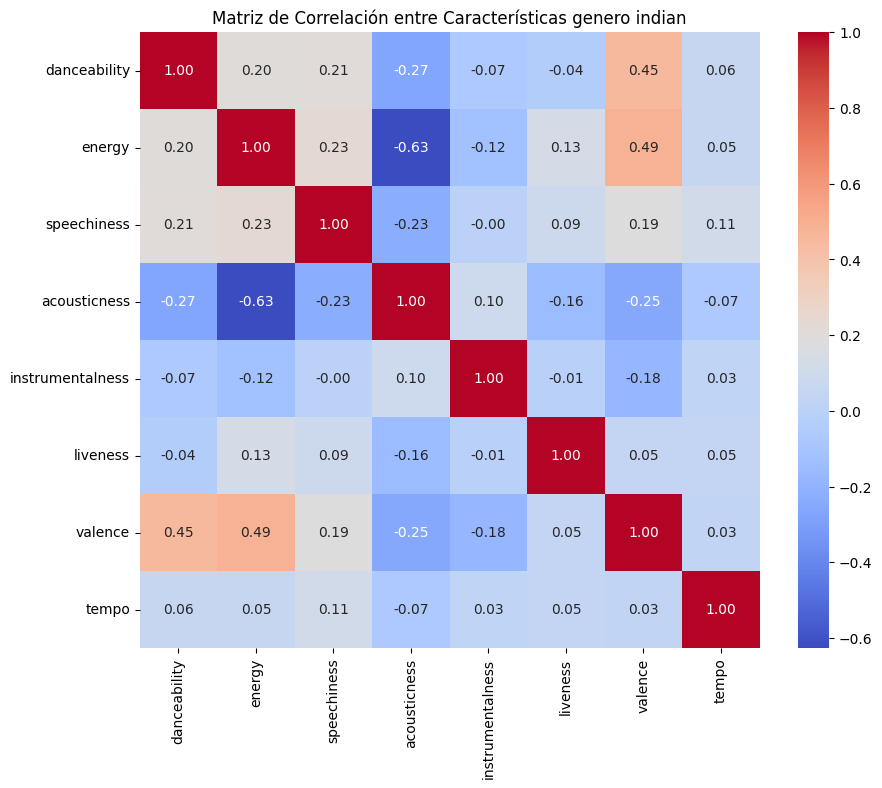

In [ ]:
# Filtrar el DataFrame por género (por ejemplo, indian)
garage_df = df[df['track_genre'] == 'indian']

# Calcular la matriz de correlación para el género "indian"
correlation_matrix = garage_df[['danceability', 'energy', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']].corr()
# Crear un mapa de calor para visualizar la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación entre Características genero indian')
plt.show()

### Cantidad de canciones explicitas y no explicitas por género

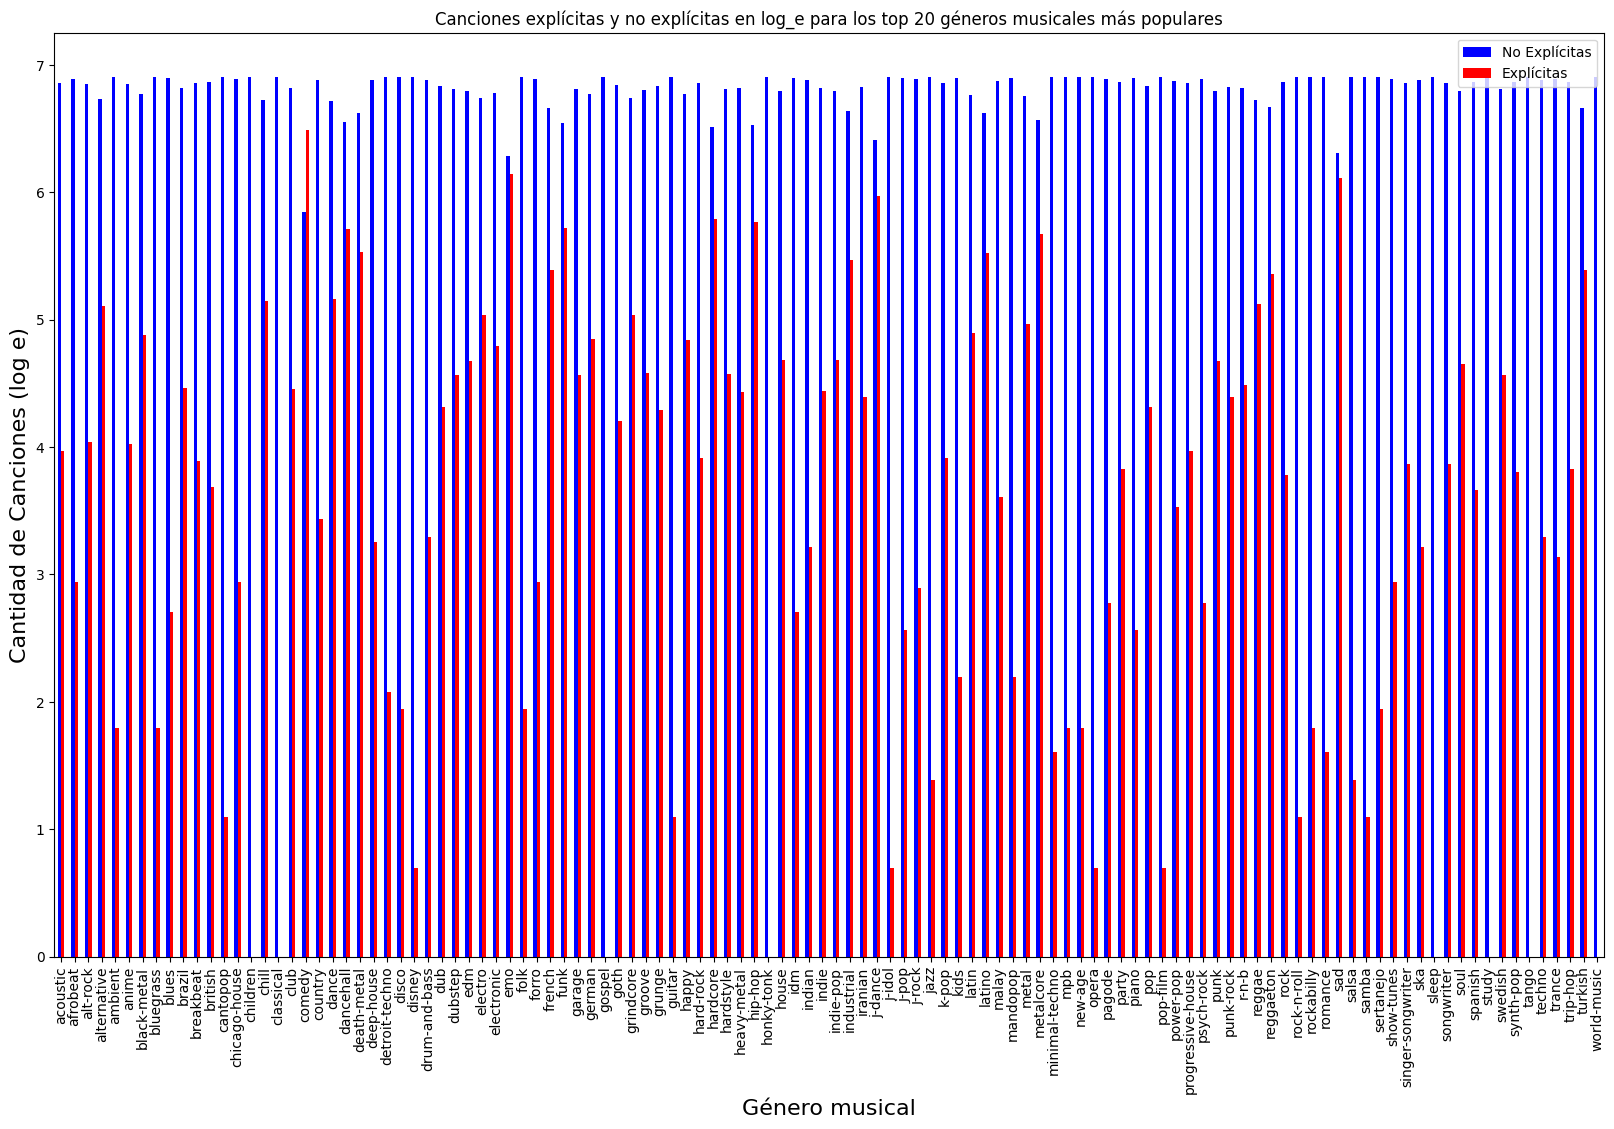

In [ ]:
# Promedio de popularidad para cada género
avg_popularity = df.groupby('track_genre')['popularity'].mean()
# Top 20 géneros de acuerdo a la popularidad
top_genres = avg_popularity.sort_values(ascending=False).head(114).index
# Filtrar el dataframe
filtered_df = df[df['track_genre'].isin(top_genres)]

# Agrupar por genero y clasificación en explicit
grouped = filtered_df.groupby(['track_genre', 'explicit']).size().unstack(fill_value=0)
# Aplicar logaritmo en base 'e' a los valores para normalizar la cantidad
grouped_log = np.log(grouped + 1)
#print(grouped_log)
#print(grouped_log.columns)
#df_sorted = grouped_log[grouped_log['Index'] == True].sort_values(by='explicit')
# Crear gráfico
plt.rcParams["figure.figsize"] = (20, 12)
grouped_log.plot(kind='bar', color=['blue', 'red'], width=0.5)
plt.xlabel('Género musical', fontsize=16)
plt.ylabel('Cantidad de Canciones (log e)', fontsize=16)
plt.title('Canciones explícitas y no explícitas en log_e para los top 20 géneros musicales más populares')
plt.legend(['No Explícitas', 'Explícitas'], loc='upper right')
plt.show()

### Duración promedio de las canciones por género

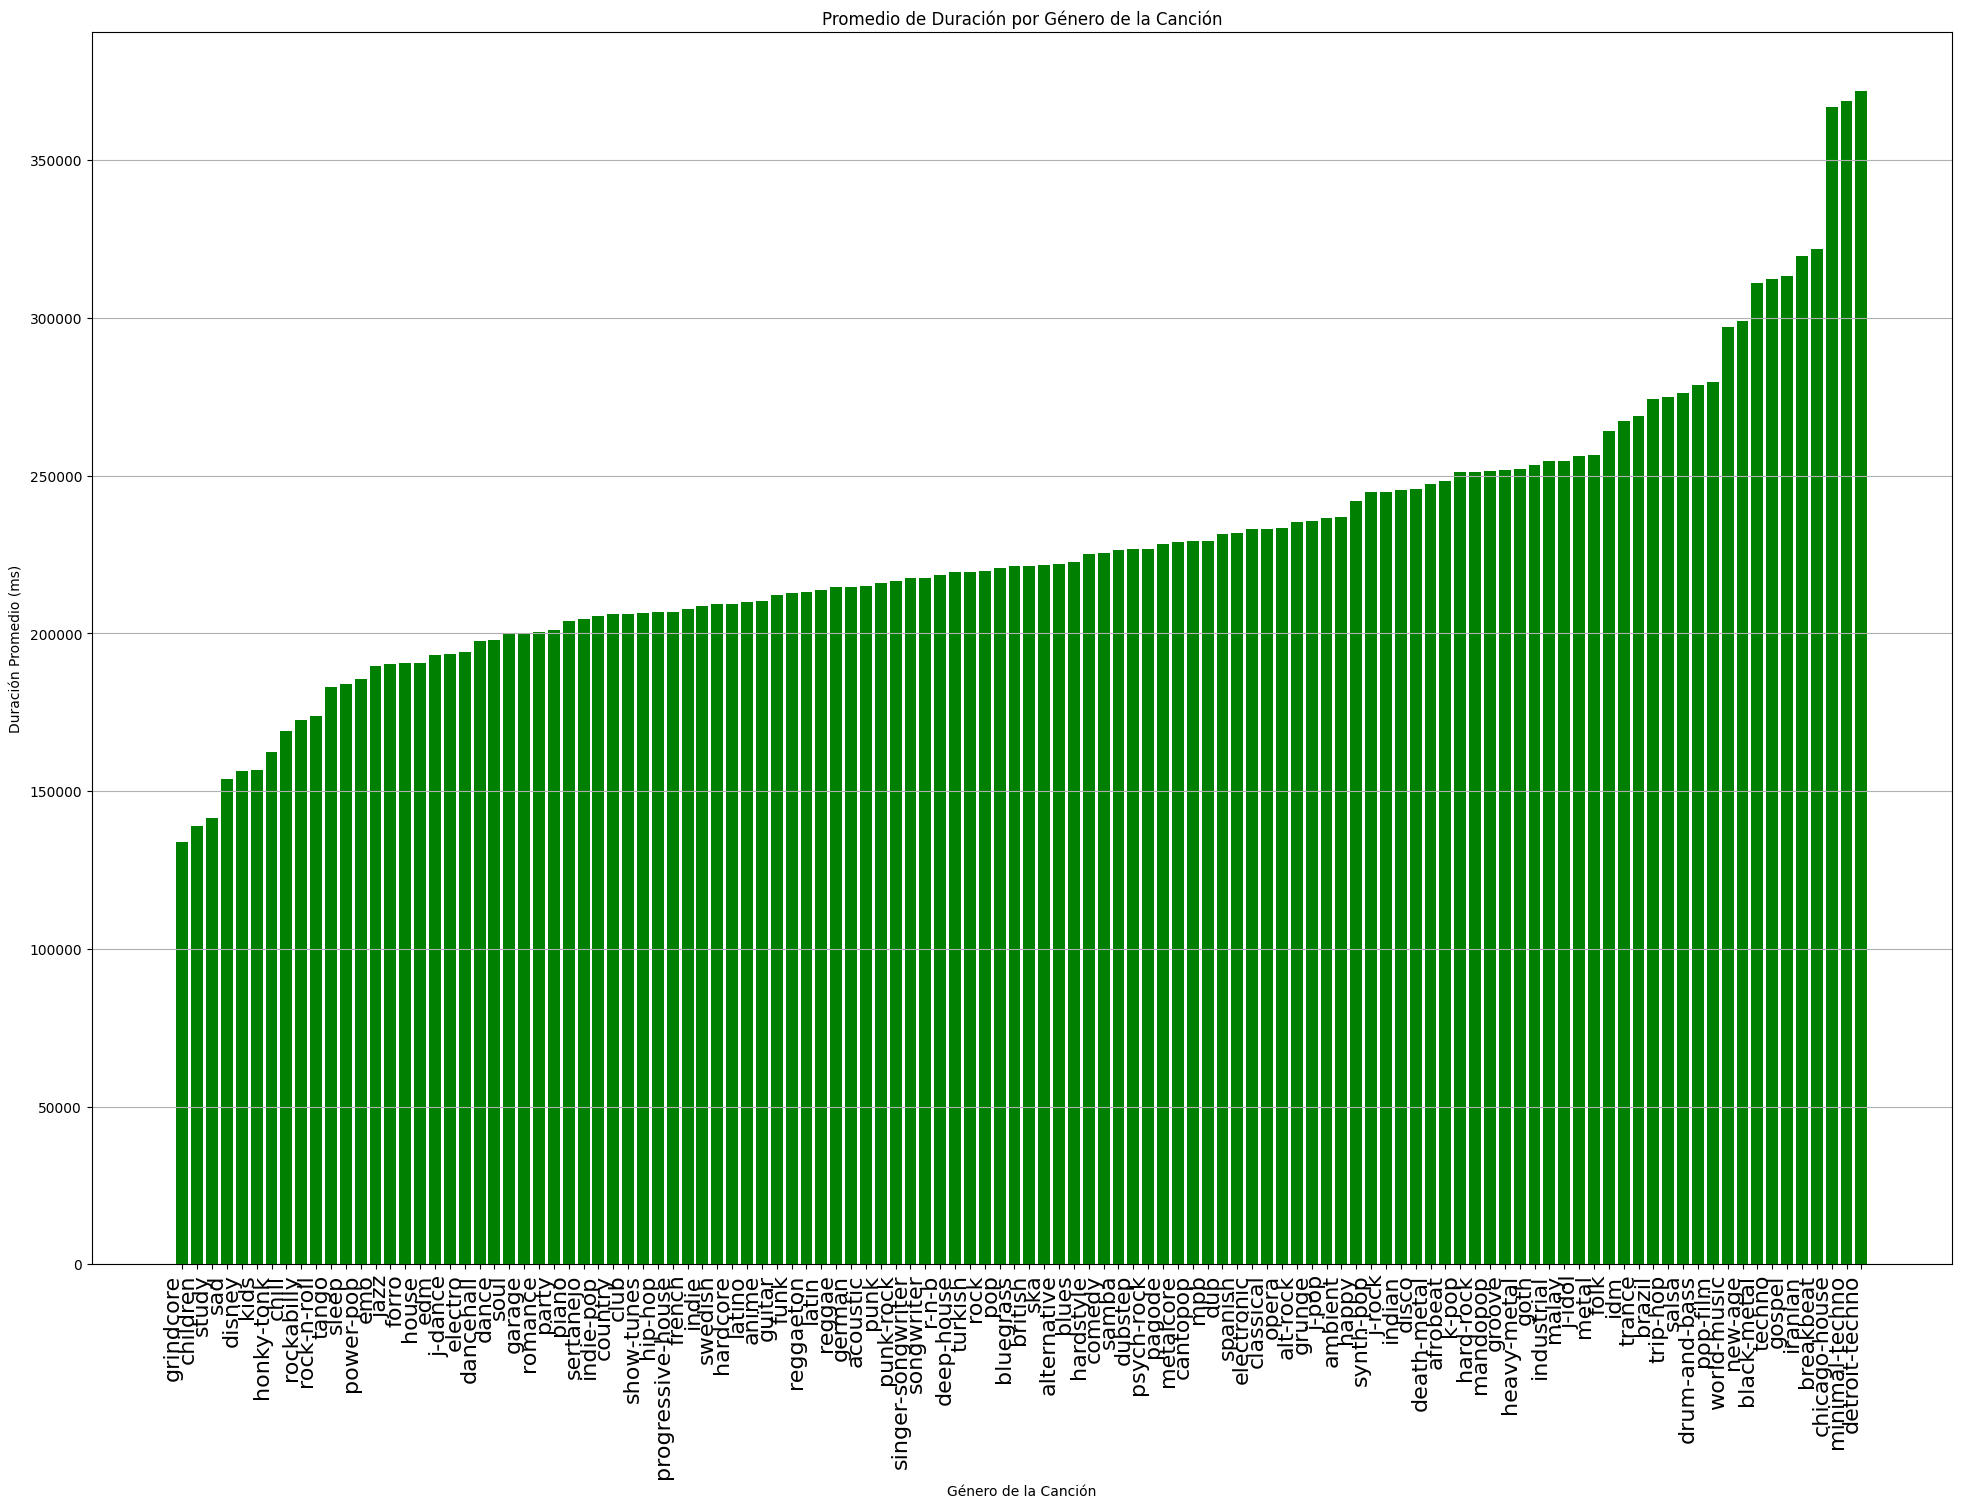

In [ ]:
# Agrupar por género de la canción y calcular el promedio de duración
avg_duration_by_genre = df.groupby('track_genre')['duration_ms'].mean().reset_index()
avg_duration_by_genre = avg_duration_by_genre.sort_values(by='duration_ms')

# Crear el gráfico de barras
plt.figure(figsize=(24, 16))
plt.bar(avg_duration_by_genre['track_genre'], avg_duration_by_genre['duration_ms'], color='green')
plt.title('Promedio de Duración por Género de la Canción')
plt.xlabel('Género de la Canción')
plt.ylabel('Duración Promedio (ms)')
plt.xticks(rotation=90, ha='right', fontsize=16)  # Rotar las etiquetas del eje x para mayor claridad
plt.grid(axis='y')
plt.show()

### Análisis mediante funcionalidad describe()

In [ ]:
df.describe()

,Unnamed: 0,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,114000.000000,114000.000000,1.140000e+05,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000
mean,56999.500000,33.238535,2.280292e+05,0.566800,0.641383,5.309140,-8.258960,0.637553,0.084652,0.314910,0.156050,0.213553,0.474068,122.147837,3.904035
std,32909.109681,22.305078,1.072977e+05,0.173542,0.251529,3.559987,5.029337,0.480709,0.105732,0.332523,0.309555,0.190378,0.259261,29.978197,0.432621
min,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28499.750000,17.000000,1.740660e+05,0.456000,0.472000,2.000000,-10.013000,0.000000,0.035900,0.016900,0.000000,0.098000,0.260000,99.218750,4.000000
50%,56999.500000,35.000000,2.129060e+05,0.580000,0.685000,5.000000,-7.004000,1.000000,0.048900,0.169000,0.000042,0.132000,0.464000,122.017000,4.000000
75%,85499.250000,50.000000,2.615060e+05,0.695000,0.854000,8.000000,-5.003000,1.000000,0.084500,0.598000,0.049000,0.273000,0.683000,140.071000,4.000000
max,113999.000000,100.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000


# Contribución de miembros


| Tarea                                    | Encargado/a           |
|------------------------------------------|-----------------------|
|        Trabajo en la Presentación        |    Scarlett Plaza     |
|                                          |    Vicente Thiele     |
| Trabajo en el Informe                    |                       |
|                                          |    Javiera Romero     |
|                                          |    Patricio Espinoza  |
|                                          |    Rodrigo Díaz       |
| Revisión Problemas                       |                       |
|                                          |    Rodrigo Díaz       |
|                                          |    Vicente Thiele     |
|                                          |    Scarlett Plaza     |
| Gráficos de Matrices de Correlación por género | |
|                                          |    Javiera Romero     |
|                                          |    Scarlett Plaza     |
| Gráfico Cantidad de Aparición de los Géneros en las 300 Canciones más Populares | |
|                                          |    Javiera Romero     |
| Gráfico Popularidad Promedio por Género  |                       |
|                                          |    Rodrigo Díaz       |
| Gráfico Cantidad de Canciones por Género |                       |
|                                          |    Rodrigo Díaz       |
| Gráfico Género por Explícito             |                       |
|                                          |    Patricio Espinoza  |
| Gráfico de Duración Promedio por Género  |                       |
|                                          |    Patricio Espinoza  |
| Análisis mediante .describe()            |                       |
|                                          |    Patricio Espinoza  |
